## Hierarchical clustering program using different distance measures

#### Import all neccessary files and libraries

In [2]:
# Reloads the local files if they change
%load_ext autoreload
%autoreload 2

# import local files
import Log_processing
import Clustering
import Comparison
import Anonymization
import Jaccard, Role_Comparison

#### Load the event logs

In [18]:
sepsis = Log_processing.get_log("../logs/sepsis_event_log.xes")
coselog = Log_processing.get_log("../logs/coselog.xes")
hospital = Log_processing.get_log("../logs/hospital_billing.xes")
workday = Log_processing.get_log("../logs/workday.xes")

parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/100000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/25 [00:00<?, ?it/s]

### Analyze the Sepsis event log

Create the dendrograms for every distance measure

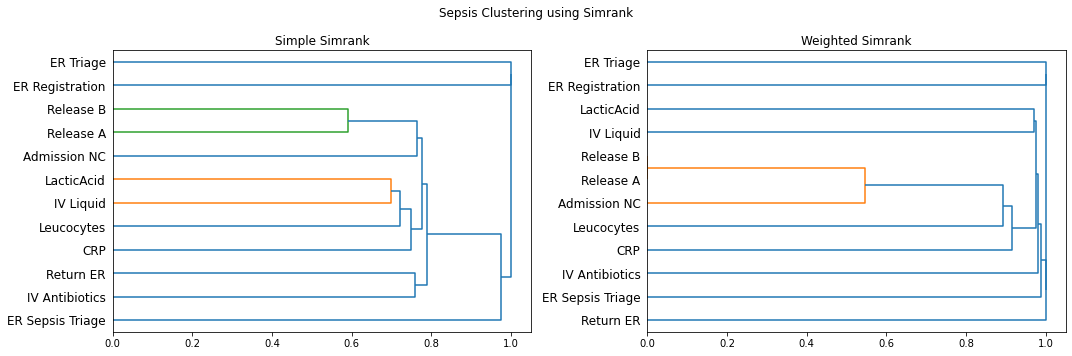

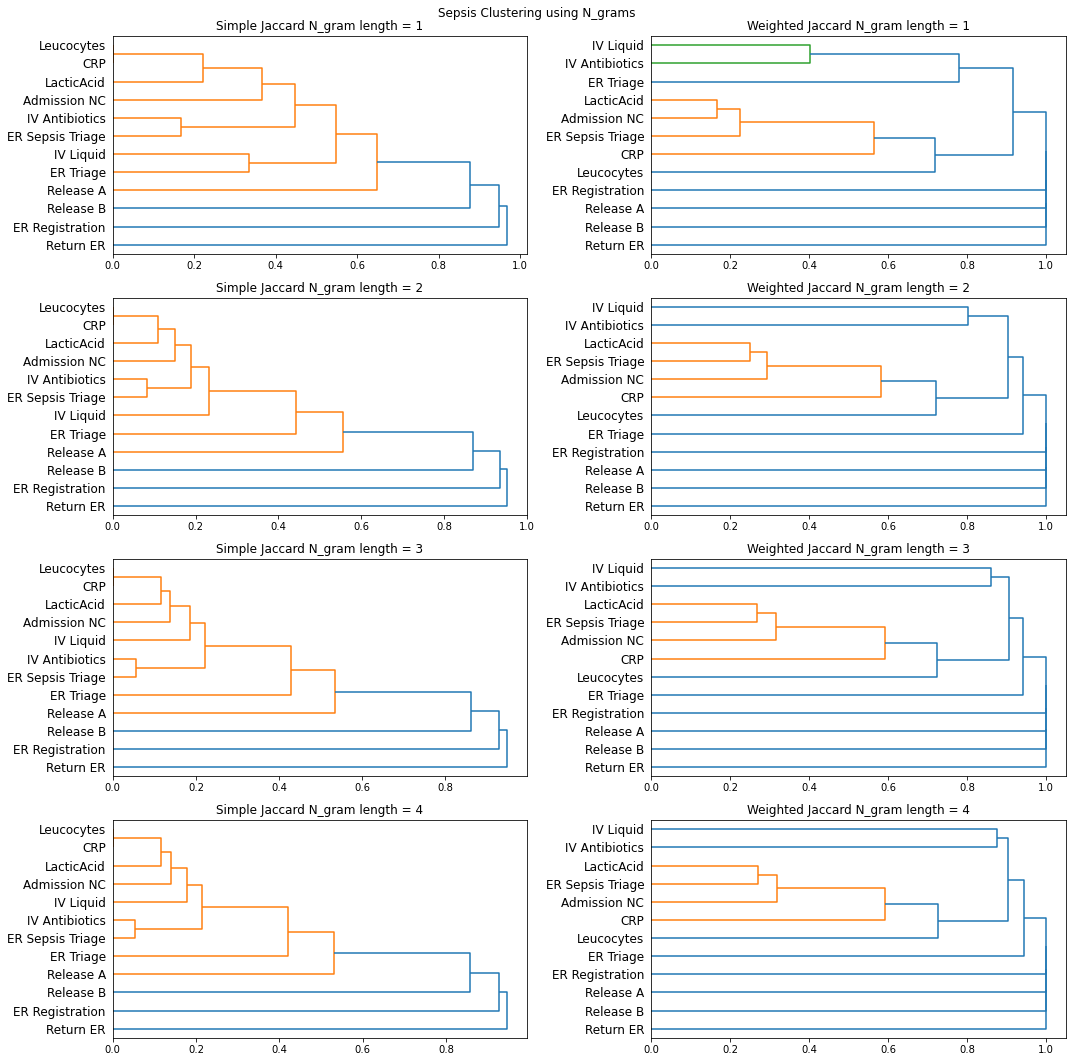

/home/jamie/Documents/Uni/Bachelor/Program/src/Label_Similarity.py:29: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  label_similarity = processed_act1.similarity(processed_act2)


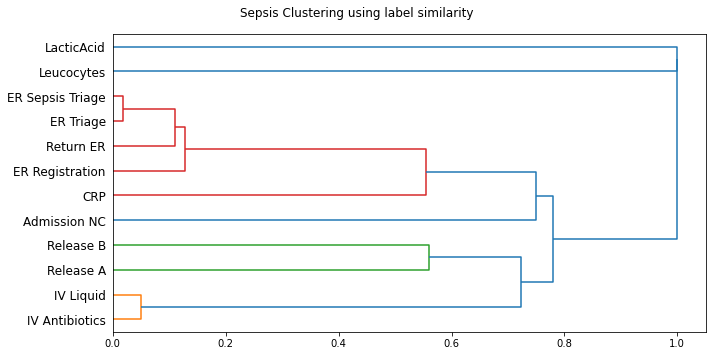

In [26]:
Log_processing.show_dfg_of_log(sepsis)
Comparison.show_jaccard_dendrograms_for_event_log(sepsis, "Sepsis Clustering using Jaccard", "sepsis_jaccard.jpg")
Comparison.show_n_gram_dendrograms_for_event_log(sepsis, "Sepsis Clustering using N_grams", "sepsis_n_gram.jpg")
Comparison.show_role_comparison_dendrograms_for_event_log(sepsis, "concept:name", "org:group", "Sepsis Clustering using role comparison", "sepsis_role_comp.jpg")
Comparison.show_label_similarity_dendrograms_for_event_log(sepsis, "Sepsis Clustering using label similarity", "sepsis_label_sim.jpg")

Create dendrograms for an attribute for every distance measure

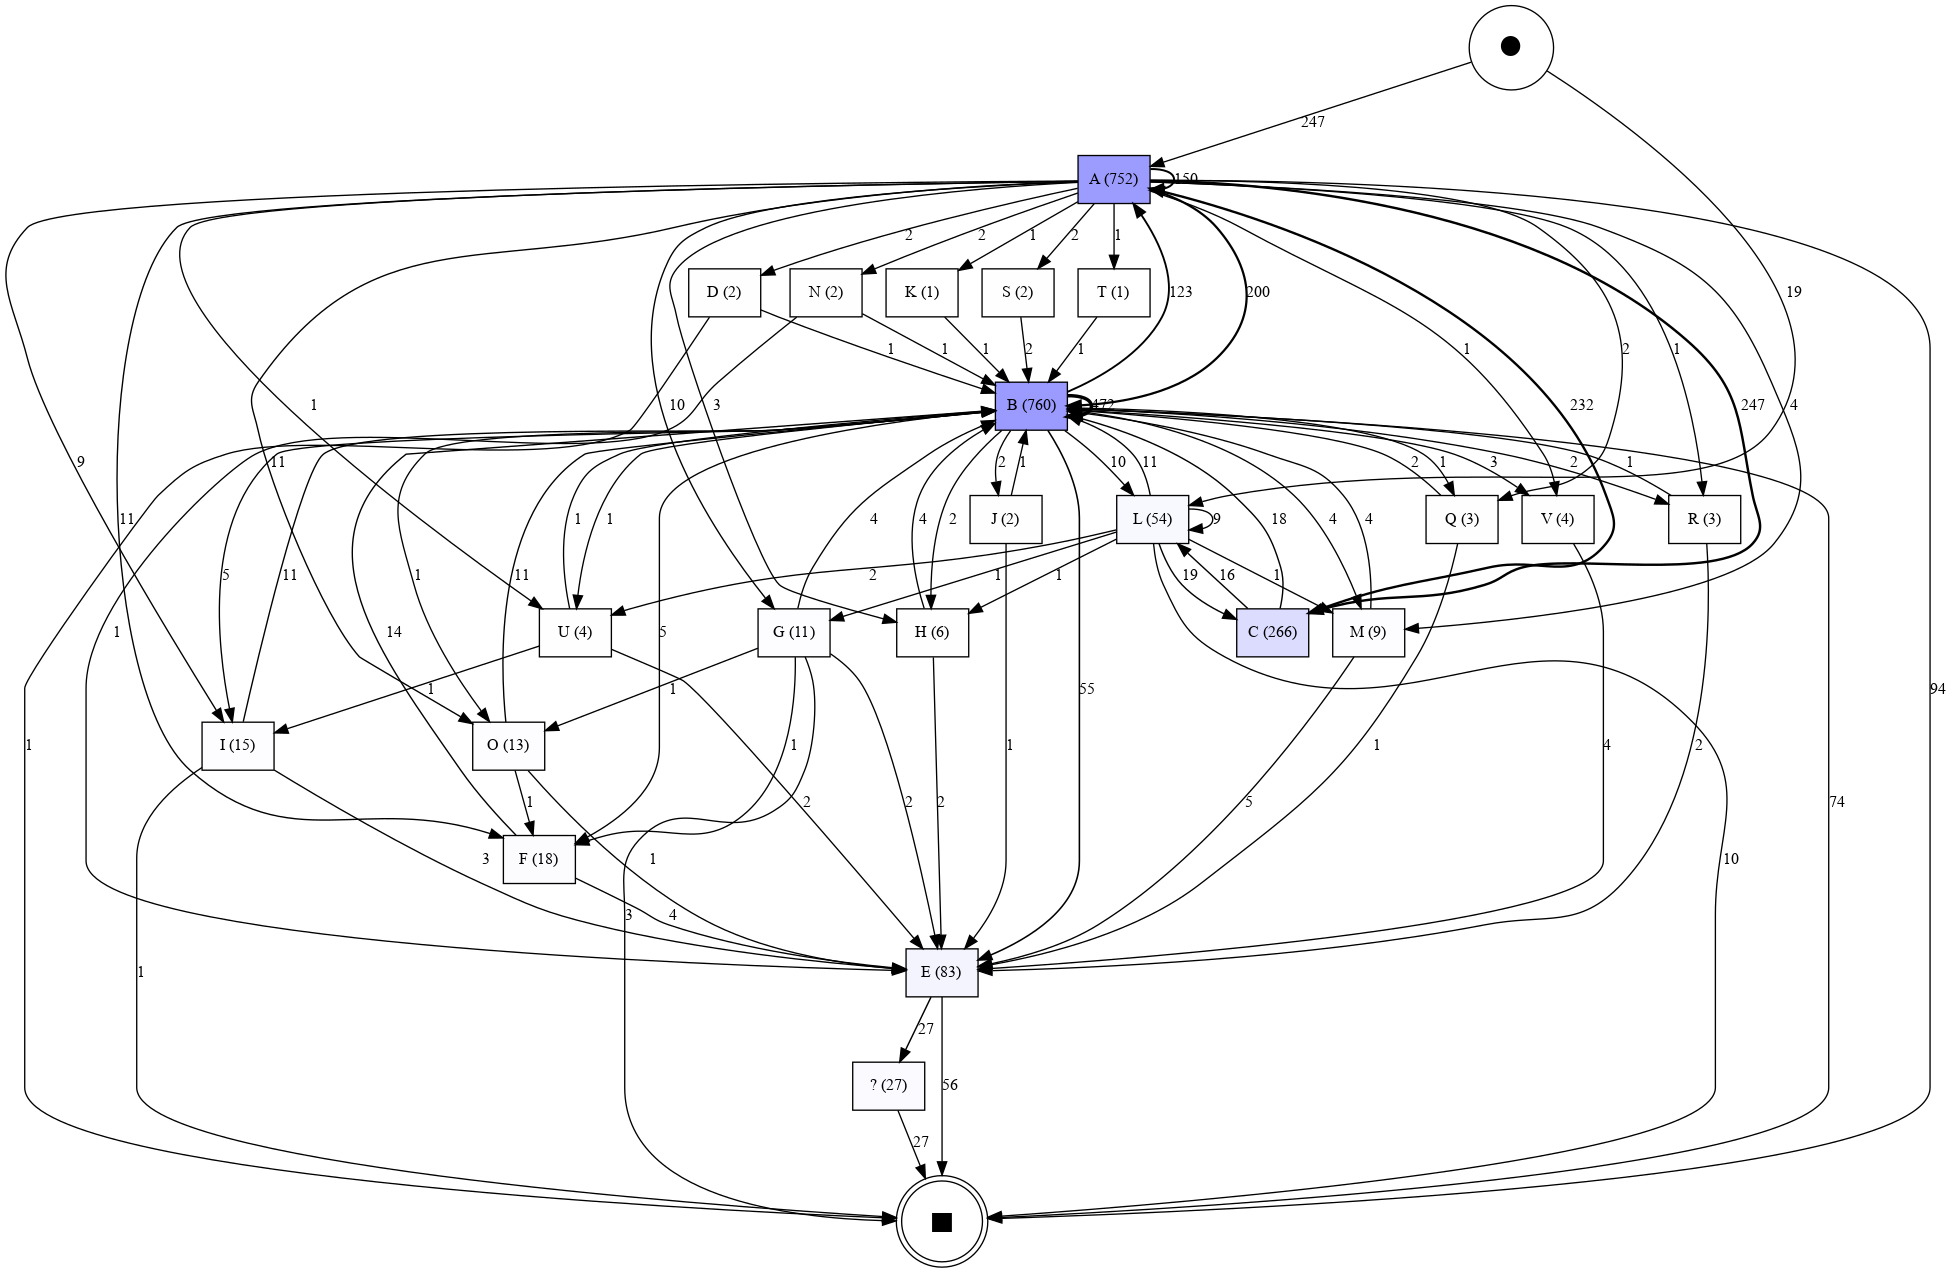

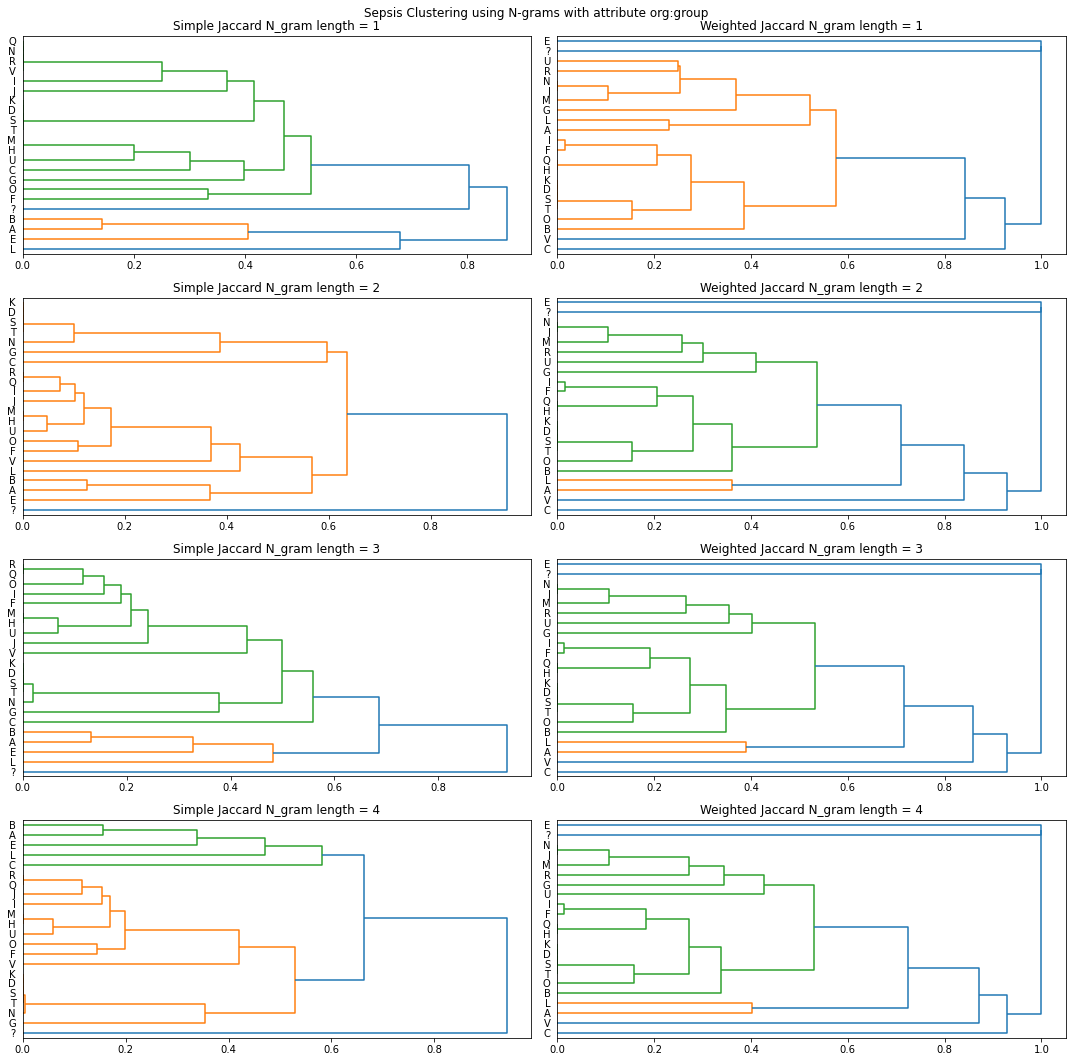

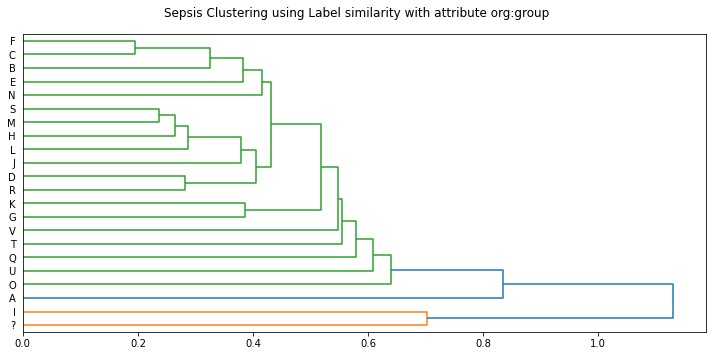

In [27]:
attribute_name = "org:group"
Log_processing.show_dfg_of_log(sepsis, activity_key="org:group")
Comparison.show_jaccard_dendrograms_for_event_log(sepsis, f"Sepsis Clustering using Jaccard with attribute {attribute_name}", f"sepsis_jaccard_{attribute_name}.jpg", activity_key=attribute_name)
Comparison.show_n_gram_dendrograms_for_event_log(sepsis, f"Sepsis Clustering using N-grams with attribute {attribute_name}", f"sepsis_n_gram_{attribute_name}.jpg", activity_key=attribute_name)
Comparison.show_label_similarity_dendrograms_for_event_log(sepsis, f"Sepsis Clustering using Label similarity with attribute {attribute_name}", f"sepsis_label_similarity_{attribute_name}.jpg", activity_key=attribute_name)

Create the hierarchy files for the Sepsis event log for every distance metric

In [8]:
sepsis_path = "../logs/sepsis_event_log.xes"
sepsis_prefix = "Sepsis"

In [ ]:
sepsis_simp_jacc_path = Anonymization.create_activity_hierarchy_file(sepsis_path, sepsis_prefix, "Simple_Jaccard")
sepsis_weight_jacc_path = Anonymization.create_activity_hierarchy_file(sepsis_path, sepsis_prefix, "Weighted_Jaccard")
sepsis_simp_n_gram_path = Anonymization.create_activity_hierarchy_file(sepsis_path, sepsis_prefix, "Simple_Jaccard_N_Gram", length=2)
sepsis_weight_n_gram_path = Anonymization.create_activity_hierarchy_file(sepsis_path, sepsis_prefix, "Weighted_Jaccard_N_Gram", length=2)
sepsis_simp_role_path = Anonymization.create_activity_hierarchy_file(sepsis_path, sepsis_prefix, "Simple_Role_Similarity", roles_column="org:group")
sepsis_weight_role_path = Anonymization.create_activity_hierarchy_file(sepsis_path, sepsis_prefix, "Weighted_Role_Similarity", roles_column="org:group")
sepsis_label_path = Anonymization.create_activity_hierarchy_file(sepsis_path, sepsis_prefix, "Label_Similarity")

Create the hierarchy files for an attribute in the Sepsis event log for every distance metric

In [ ]:
sepsis_attr = "org:group"
sepsis_attr_simp_jacc_path = Anonymization.create_attribute_hierarchy_file(sepsis_path, sepsis_prefix, sepsis_attr, "Simple_Jaccard")
sepsis_attr_weight_jacc_path = Anonymization.create_attribute_hierarchy_file(sepsis_path, sepsis_prefix, sepsis_attr, "Weighted_Jaccard")
sepsis_attr_simp_n_gram_path = Anonymization.create_attribute_hierarchy_file(sepsis_path, sepsis_prefix, sepsis_attr, "Simple_Jaccard_N_Gram", length=2)
sepsis_attr_weight_n_gram_path = Anonymization.create_attribute_hierarchy_file(sepsis_path, sepsis_prefix, sepsis_attr, "Weighted_Jaccard_N_Gram", length=2)
sepsis_attr_label_path = Anonymization.create_attribute_hierarchy_file(sepsis_path, sepsis_prefix, sepsis_attr, "Label_Similarity")

#### Anonymize the Sepsis event log

Anonymize the Sepsis event log with k= 5, 10 and 20 using Simple Jaccard

In [ ]:
for k in [5, 10, 20]:
    priv_sepsis_simp_jacc = Anonymization.anonymize_log(
        sepsis_path,
        sepsis_prefix,
        k,
        sepsis_simp_jacc_path,
        sepsis_attr,
        sepsis_attr_simp_jacc_path
    )

Anonymize the Sepsis event log with k= 5, 10 and 20 using Weighted Jaccard

In [ ]:
for k in [5, 10, 20]:
    priv_sepsis_weight_jacc = Anonymization.anonymize_log(
        sepsis_path,
        sepsis_prefix,
        k,
        sepsis_weight_jacc_path,
        sepsis_attr,
        sepsis_attr_weight_jacc_path
    )

Anonymize the Sepsis event log with k= 5, 10 and 20 using Simple Jaccard N-Grams 

In [ ]:
for k in [5, 10, 20]:
    priv_sepsis_simp_n_gram = Anonymization.anonymize_log(
        sepsis_path,
        sepsis_prefix,
        k,
        sepsis_simp_n_gram_path,
        sepsis_attr,
        sepsis_attr_simp_n_gram_path
    )

Anonymize the Sepsis event log with k= 5, 10 and 20 using Weighted Jaccard N-Grams

In [ ]:
for k in [5, 10, 20]:
    priv_sepsis_weight_n_gram = Anonymization.anonymize_log(
        sepsis_path,
        sepsis_prefix,
        k,
        sepsis_weight_n_gram_path,
        sepsis_attr,
        sepsis_attr_weight_n_gram_path
    )

Anonymize the Sepsis event log with k= 5, 10 and 20 using Simple Jaccard Role Similarity

In [ ]:
# No anonymization for attributes here
for k in [5, 10, 20]:
    priv_sepsis_simp_role = Anonymization.anonymize_log(
        sepsis_path,
        sepsis_prefix,
        k,
        sepsis_simp_role_path
    )

Anonymize the Sepsis event log with k= 5, 10 and 20 using Weighted Jaccard Role Similarity

In [ ]:
# No anonymization for attributes here
for k in [5, 10, 20]:
    priv_sepsis_weight_role = Anonymization.anonymize_log(
        sepsis_path,
        sepsis_prefix,
        k,
        sepsis_weight_role_path
    )

Anonymize the Sepsis event log with k= 5, 10 and 20 using NLP Label Similarity

In [ ]:
for k in [5, 10, 20]:
    priv_sepsis_label_sim = Anonymization.anonymize_log(
        sepsis_path,
        sepsis_prefix,
        k,
        sepsis_label_path,
        sepsis_attr,
        sepsis_attr_label_path
    )

Open handover graphs of the Sepsis event log

In [104]:
Comparison.save_and_open_handover_graph_of_log(sepsis, resource_key="concept:name", filename="sepsis_handover_activity.html")
Comparison.save_and_open_handover_graph_of_log(sepsis, resource_key="org:group", filename="sepsis_handover_attribute_orggroup.html")

Open the handovers of the anonymized logs

In [100]:
attribute_name = "org:group"
for k in [5, 10, 20]:
    for metric in ["Simple_Jaccard", "Weighted_Jaccard", "Simple_N_gram", "Weighted_N_gram", "Simple_Role", "Weighted_Role", "Label_Similarity"]:
        priv_sepsis = Log_processing.get_log(f"../data/Sepsis/anonymized_logs/{metric}/Sepsis_{metric}_anonymized_log_k_{k}_with_attributes.xes")
        Comparison.save_and_open_handover_graph_of_log(priv_sepsis, resource_key="concept:name", filename=f"Sepsis_{metric}_k_{k}_handover.html")
        Comparison.save_and_open_handover_graph_of_log(priv_sepsis, resource_key=attribute_name, filename=f"Sepsis_{metric}_attribute_orggroup_k_{k}_handover.html")

    for metric in ["Simple_Role", "Weighted_Role"]:
        priv_sepsis = Log_processing.get_log(f"../data/Sepsis/anonymized_logs/{metric}/Sepsis_{metric}_anonymized_log_k_{k}.xes")
        Comparison.save_and_open_handover_graph_of_log(priv_sepsis, resource_key="concept:name", filename=f"Sepsis_{metric}_k_{k}_handover.html")

parsing log, completed traces ::   0%|          | 0/266 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/266 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/266 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/266 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/266 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/266 [00:00<?, ?it/s]

Compare the clusterings with the Fowlkes-Mallows-Score

In [20]:
sepsis_simple_jaccard = Jaccard.Simple_Jaccard(sepsis)
sepsis_simple_jaccard.perform_clustering(no_plot=True)
sepsis_simple_jaccard_split = Jaccard.Simple_Jaccard(sepsis)
sepsis_simple_jaccard_split.perform_clustering(no_plot=True, split_neighbours=True)
sepsis_weighted_jaccard = Jaccard.Weighted_Jaccard(sepsis)
sepsis_weighted_jaccard.perform_clustering(no_plot=True)
sepsis_simple_n_gram = Jaccard.Jaccard_N_grams(sepsis)
sepsis_simple_n_gram.perform_clustering(2, no_plot=True)
sepsis_weighted_n_gram = Jaccard.Weighted_Jaccard_N_grams(sepsis)
sepsis_weighted_n_gram.perform_clustering(2, no_plot=True)
sepsis_simple_role_comp = Role_Comparison.Role_Comparison(sepsis, "concept:name", "org:group")
sepsis_simple_role_comp.perform_clustering(no_plot=True)
sepsis_weighted_role_comp = Role_Comparison.Role_Comparison(sepsis, "concept:name", "org:group")
sepsis_weighted_role_comp.perform_clustering(no_plot=True)

{1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0}

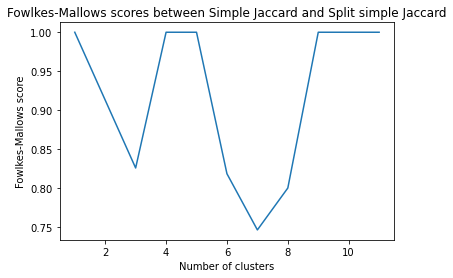

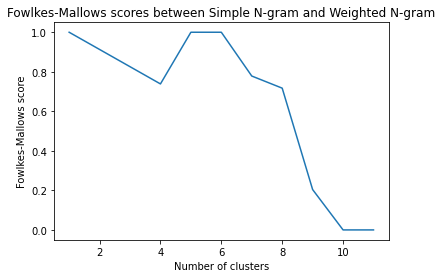

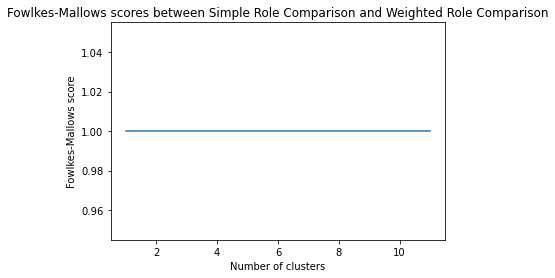

In [21]:
Comparison.compare_dendrogram_using_fowlkes_mallows_score(sepsis_simple_jaccard, sepsis_simple_jaccard_split, "Simple Jaccard", "Split simple Jaccard")
Comparison.compare_dendrogram_using_fowlkes_mallows_score(sepsis_weighted_jaccard, sepsis_simple_jaccard_split, "Weighted Jaccard", "Split simple Jaccard")
Comparison.compare_dendrogram_using_fowlkes_mallows_score(sepsis_simple_jaccard, sepsis_weighted_jaccard, "Simple Jaccard", "Weighted Jaccard")
Comparison.compare_dendrogram_using_fowlkes_mallows_score(sepsis_simple_n_gram, sepsis_weighted_n_gram, "Simple N-gram", "Weighted N-gram")
Comparison.compare_dendrogram_using_fowlkes_mallows_score(sepsis_simple_role_comp, sepsis_weighted_role_comp, "Simple Role Comparison", "Weighted Role Comparison")

Also compare the clusterings of the attribute org:group

In [31]:
sepsis_simple_jaccard_attr = Jaccard.Simple_Jaccard(sepsis)
sepsis_simple_jaccard_attr.perform_clustering(no_plot=True, activity_key="org:group")
sepsis_simple_jaccard_split_attr = Jaccard.Simple_Jaccard(sepsis)
sepsis_simple_jaccard_split_attr.perform_clustering(no_plot=True, activity_key="org:group", split_neighbours=True)
sepsis_weighted_jaccard_attr = Jaccard.Weighted_Jaccard(sepsis)
sepsis_weighted_jaccard_attr.perform_clustering(no_plot=True, activity_key="org:group")
sepsis_simple_n_gram_attr = Jaccard.Jaccard_N_grams(sepsis)
sepsis_simple_n_gram_attr.perform_clustering(3, no_plot=True, activity_key="org:group")
sepsis_weighted_n_gram_attr = Jaccard.Weighted_Jaccard_N_grams(sepsis)
sepsis_weighted_n_gram_attr.perform_clustering(3, no_plot=True, activity_key="org:group")

{1: 1.0,
 2: 0.9534625892455924,
 3: 0.8462405415212384,
 4: 0.8379570972961199,
 5: 0.537373290623879,
 6: 0.5841269128324421,
 7: 0.40074308634180944,
 8: 0.41998195157666685,
 9: 0.4327054917067629,
 10: 0.3811812499312437,
 11: 0.37796447300922725,
 12: 0.3337119062359573,
 13: 0.3338489304447943,
 14: 0.38729833462074165,
 15: 0.4834937784152281,
 16: 0.5773502691896258,
 17: 0.7499999999999999,
 18: 0.7499999999999999,
 19: 0.7499999999999999,
 20: 0.7499999999999999,
 21: 0.7499999999999999}

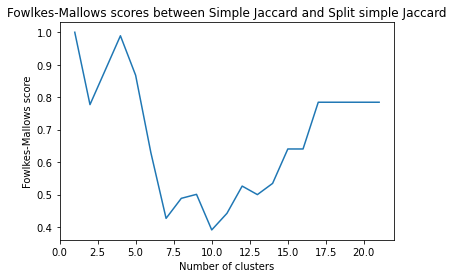

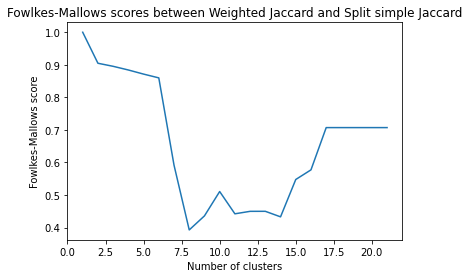

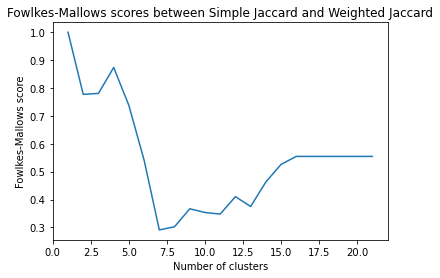

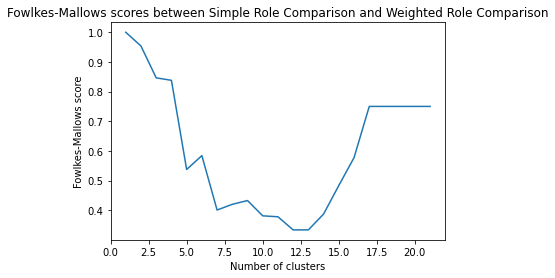

In [32]:
Comparison.compare_dendrogram_using_fowlkes_mallows_score(sepsis_simple_jaccard_attr, sepsis_simple_jaccard_split_attr, "Simple Jaccard", "Split simple Jaccard")
Comparison.compare_dendrogram_using_fowlkes_mallows_score(sepsis_weighted_jaccard_attr, sepsis_simple_jaccard_split_attr, "Weighted Jaccard", "Split simple Jaccard")
Comparison.compare_dendrogram_using_fowlkes_mallows_score(sepsis_simple_jaccard_attr, sepsis_weighted_jaccard_attr, "Simple Jaccard", "Weighted Jaccard")
Comparison.compare_dendrogram_using_fowlkes_mallows_score(sepsis_simple_n_gram_attr, sepsis_weighted_n_gram_attr, "Simple Role Comparison", "Weighted Role Comparison")

### Analyze the Coselog event log

Create the dendrograms for every distance measure

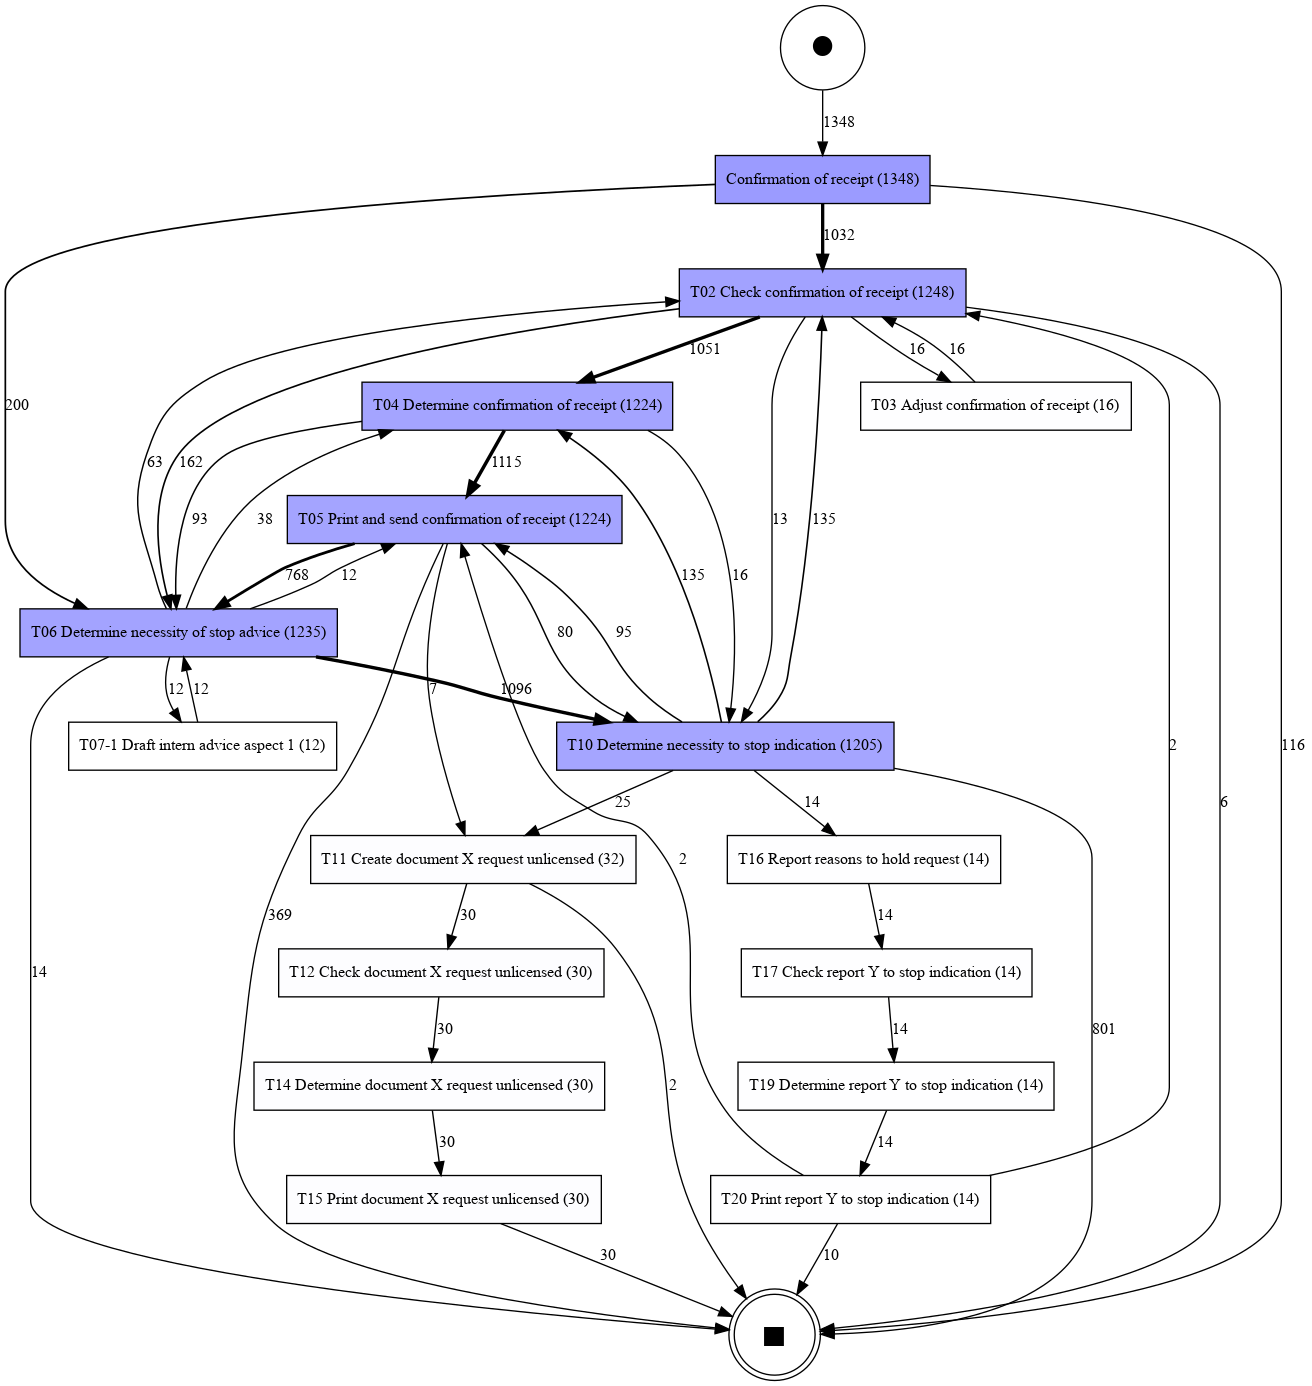

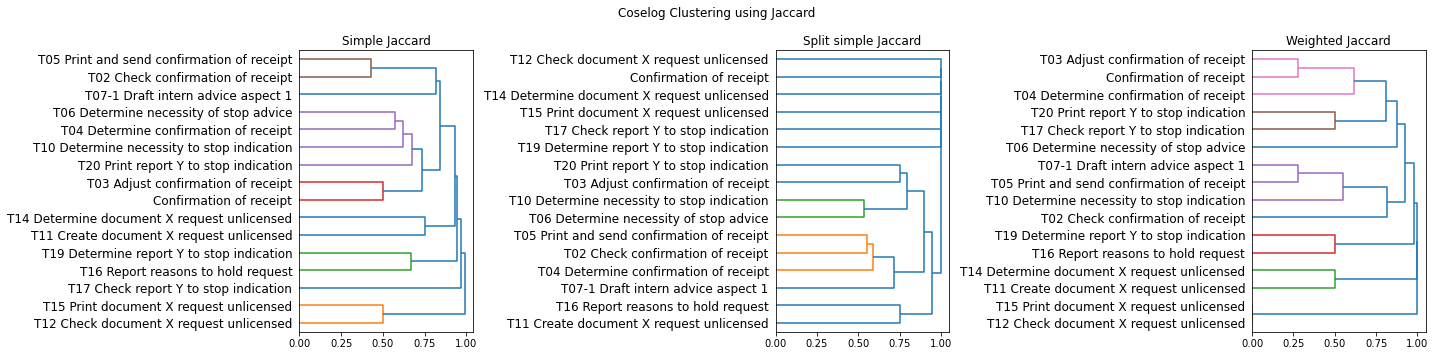

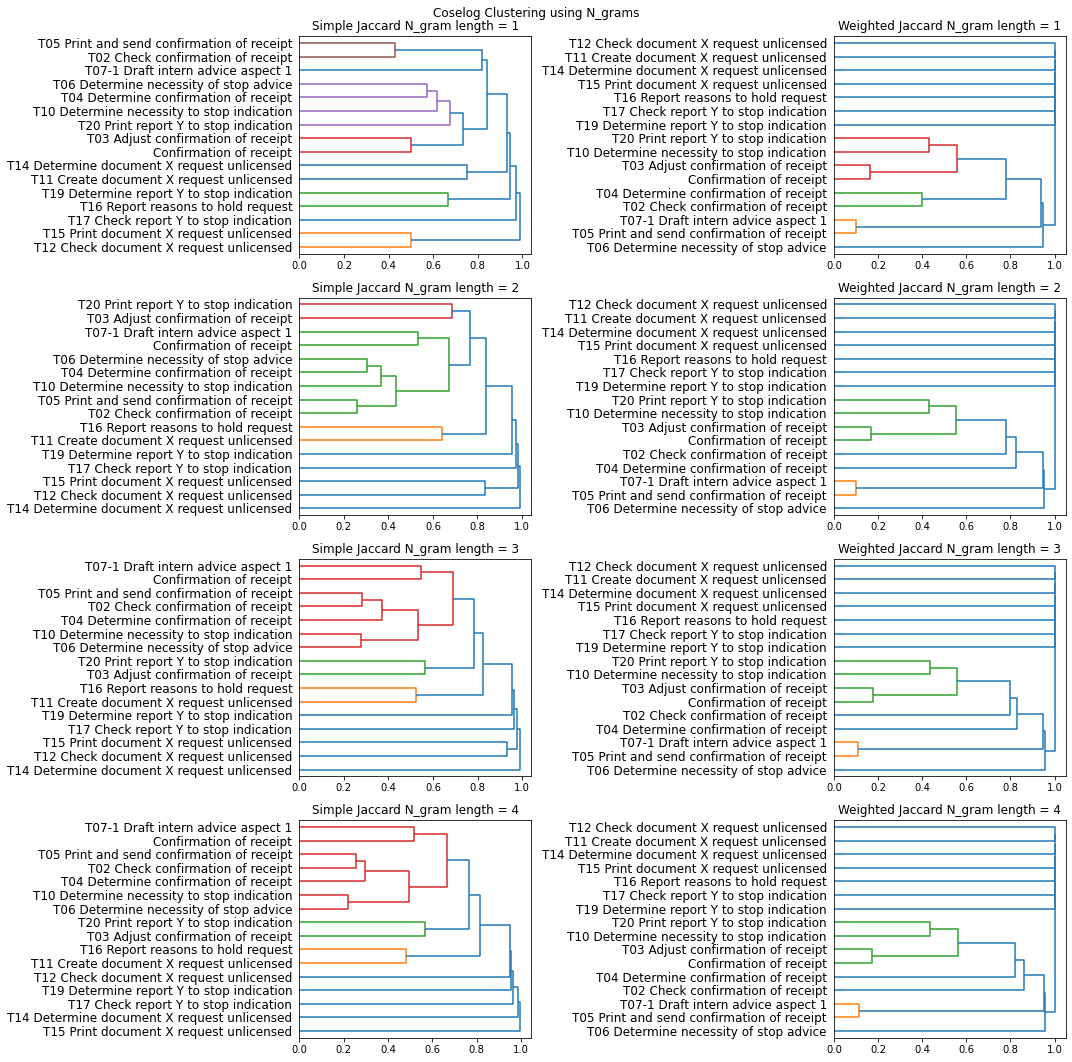

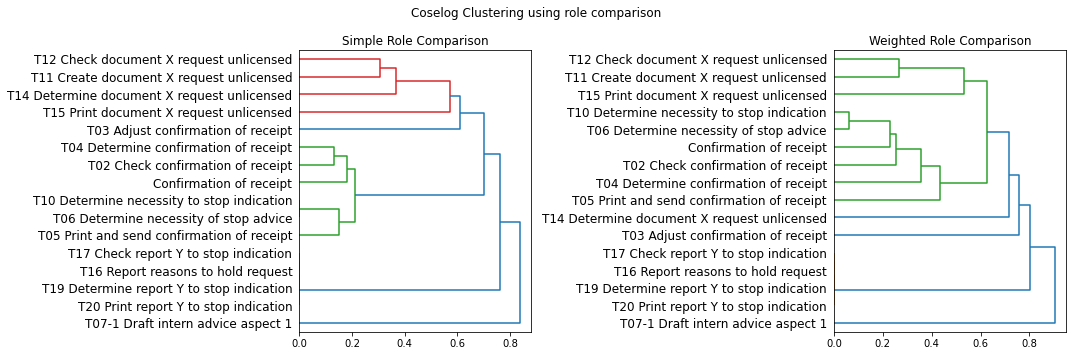

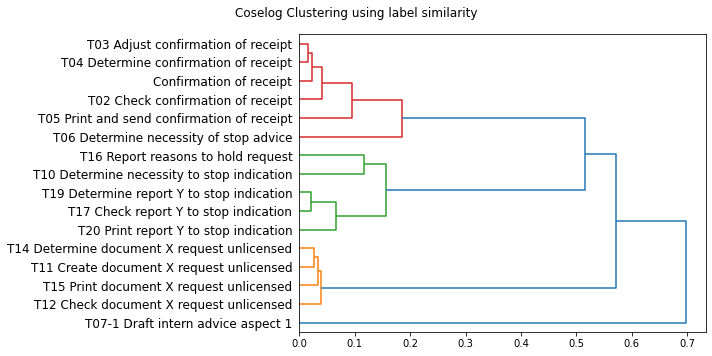

In [87]:
Log_processing.show_dfg_of_log(coselog)
Comparison.show_jaccard_dendrograms_for_event_log(coselog, "Coselog Clustering using Jaccard", "coselog_jaccard.jpg")
Comparison.show_n_gram_dendrograms_for_event_log(coselog, "Coselog Clustering using N_grams", "coselog_n_gram.jpg")
Comparison.show_role_comparison_dendrograms_for_event_log(coselog, "concept:name", "org:resource", "Coselog Clustering using role comparison", "coselog_role_comp.jpg")
Comparison.show_label_similarity_dendrograms_for_event_log(coselog, "Coselog Clustering using label similarity", "coselog_label_sim.jpg")

Create dendrograms for an attribute for every distance measure

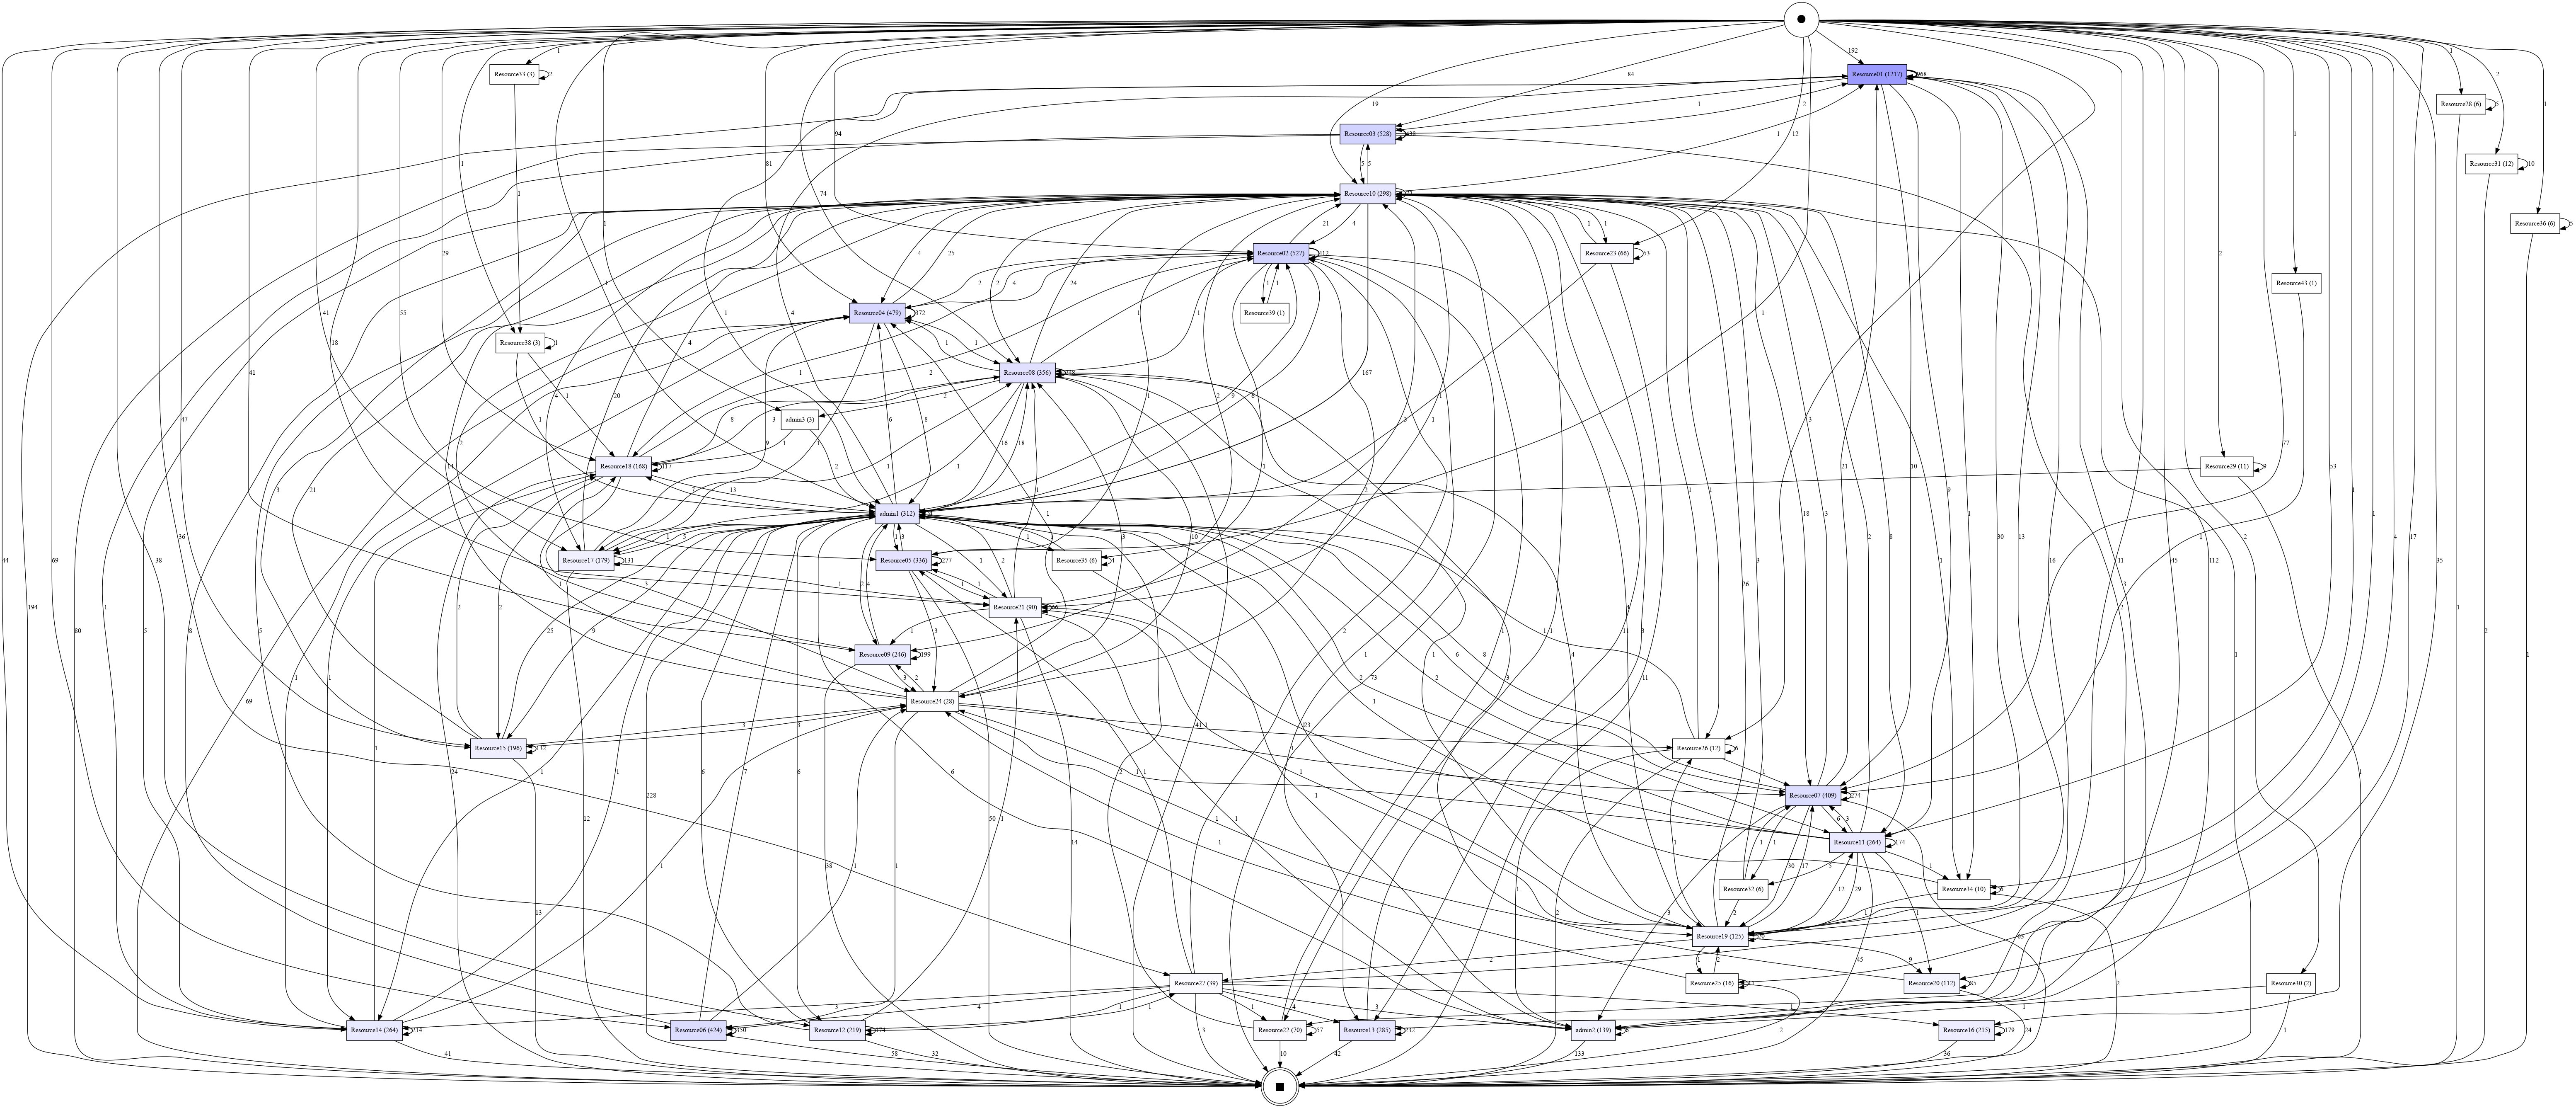

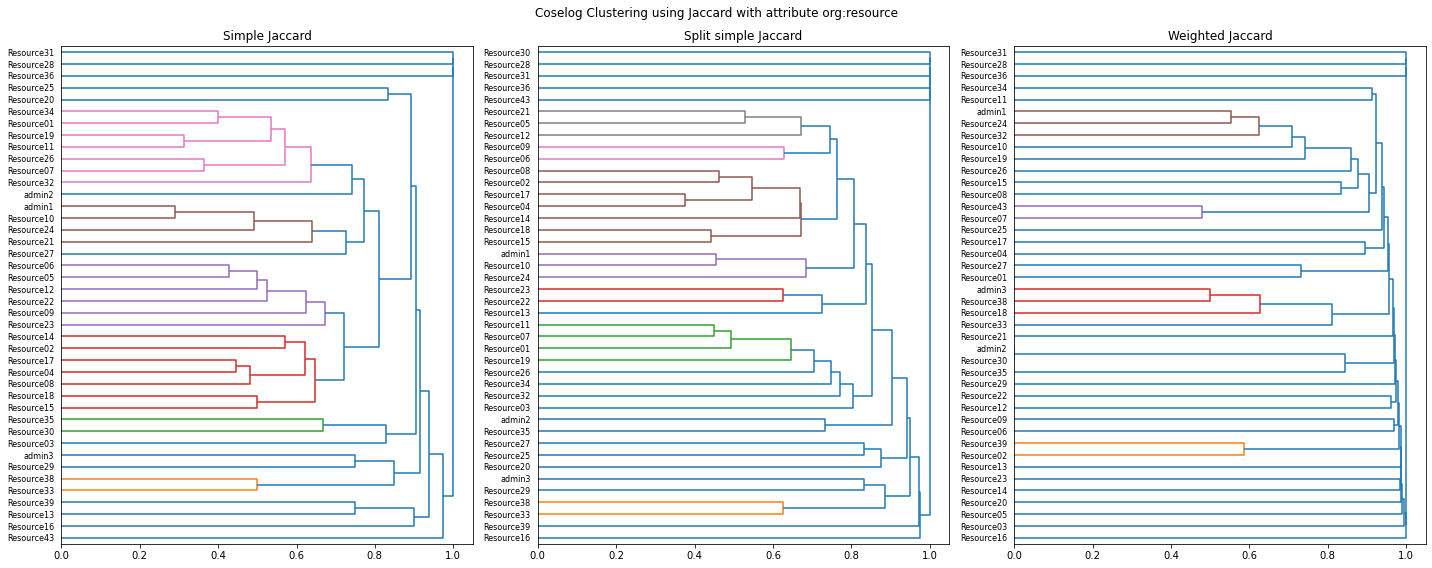

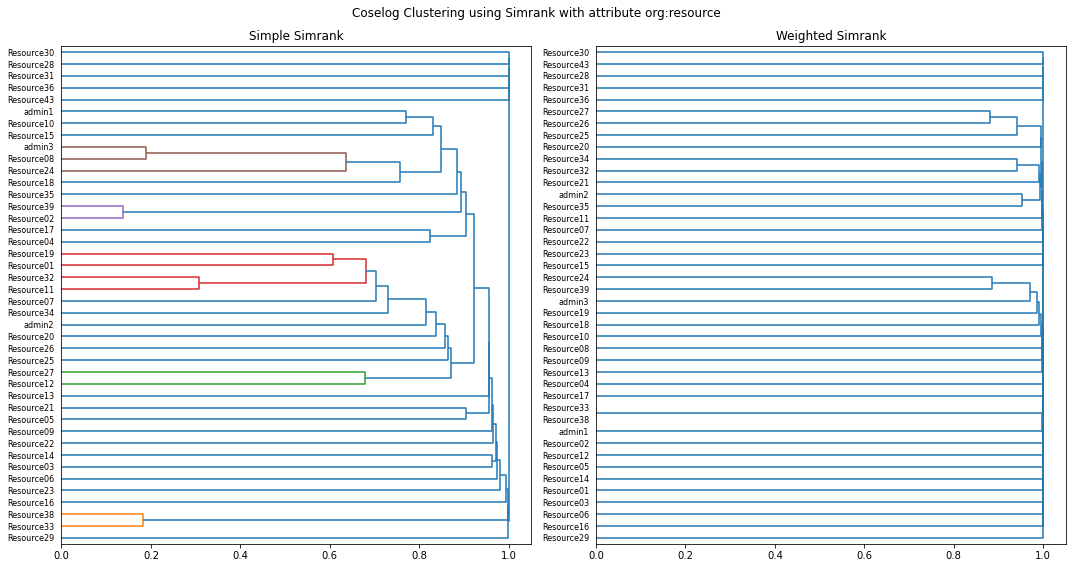

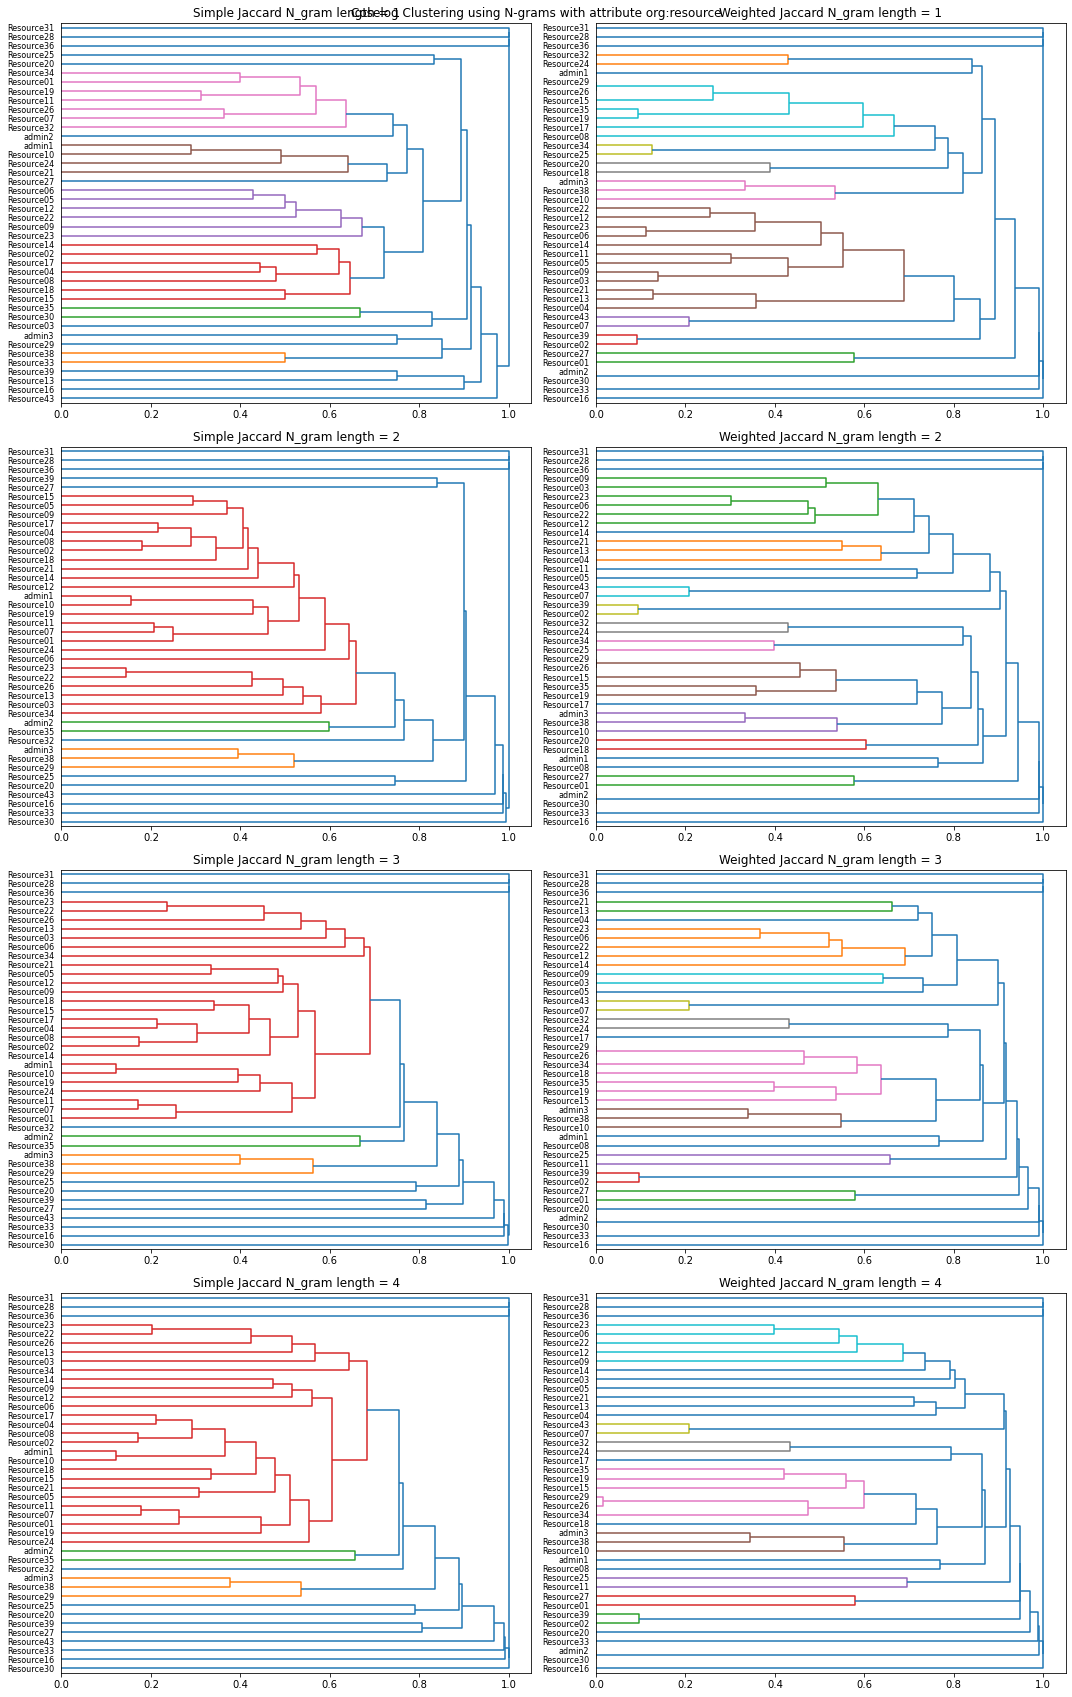

/home/jamie/Documents/Uni/Bachelor/Program/src/Label_Similarity.py:29: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  label_similarity = processed_act1.similarity(processed_act2)


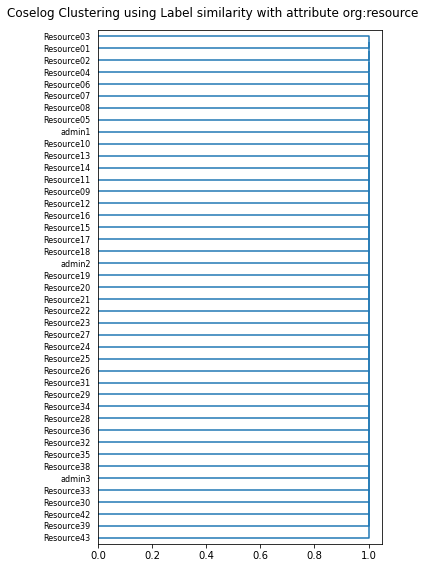

In [77]:
attribute_name = "org:resource"
Log_processing.show_dfg_of_log(coselog, activity_key="org:resource")
Comparison.show_jaccard_dendrograms_for_event_log(coselog, f"Coselog Clustering using Jaccard with attribute {attribute_name}", f"coselog_jaccard_{attribute_name}.jpg", activity_key=attribute_name, figsize=(20,8))
Comparison.show_n_gram_dendrograms_for_event_log(coselog, f"Coselog Clustering using N-grams with attribute {attribute_name}", f"coselog_n_gram_{attribute_name}.jpg", activity_key=attribute_name, figsize=(15,24))
Comparison.show_label_similarity_dendrograms_for_event_log(coselog, f"Coselog Clustering using Label similarity with attribute {attribute_name}", f"coselog_label_similarity_{attribute_name}.jpg", activity_key=attribute_name, figsize=(5,8))

Create the hierarchy files for the event log for every distance metric


In [75]:
coselog_path = "../logs/coselog.xes"
coselog_prefix = "Coselog"

In [89]:
coselog_simp_jacc_path = Anonymization.create_activity_hierarchy_file(coselog_path, coselog_prefix, "Simple_Jaccard")
coselog_weight_jacc_path = Anonymization.create_activity_hierarchy_file(coselog_path, coselog_prefix, "Weighted_Jaccard")
coselog_simp_n_gram_path = Anonymization.create_activity_hierarchy_file(coselog_path, coselog_prefix, "Simple_Jaccard_N_Gram", length=2)
coselog_weight_n_gram_path = Anonymization.create_activity_hierarchy_file(coselog_path, coselog_prefix, "Weighted_Jaccard_N_Gram", length=2)
coselog_simp_role_path = Anonymization.create_activity_hierarchy_file(coselog_path, coselog_prefix, "Simple_Role_Similarity", roles_column="org:resource")
coselog_weight_role_path = Anonymization.create_activity_hierarchy_file(coselog_path, coselog_prefix, "Weighted_Role_Similarity", roles_column="org:resource")
coselog_label_path = Anonymization.create_activity_hierarchy_file(coselog_path, coselog_prefix, "Label_Similarity")

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

Create the hierarchy files for an attribute in the event log for every distance metric

In [90]:
coselog_attr = "org:resource"
coselog_attr_simp_jacc_path = Anonymization.create_attribute_hierarchy_file(coselog_path, coselog_prefix, coselog_attr, "Simple_Jaccard")
coselog_attr_weight_jacc_path = Anonymization.create_attribute_hierarchy_file(coselog_path, coselog_prefix, coselog_attr, "Weighted_Jaccard")
coselog_attr_simp_n_gram_path = Anonymization.create_attribute_hierarchy_file(coselog_path, coselog_prefix, coselog_attr, "Simple_Jaccard_N_Gram", length=2)
coselog_attr_weight_n_gram_path = Anonymization.create_attribute_hierarchy_file(coselog_path, coselog_prefix, coselog_attr, "Weighted_Jaccard_N_Gram", length=2)
coselog_attr_label_path = Anonymization.create_attribute_hierarchy_file(coselog_path, coselog_prefix, coselog_attr, "Label_Similarity")

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

/home/jamie/Documents/Uni/Bachelor/Program/src/Label_Similarity.py:29: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  label_similarity = processed_act1.similarity(processed_act2)


#### Anonymize the Coselog event log

Anonymize the event log with k = 5, 10 and 20 using Simple Jaccard

In [91]:
for k in [5, 10, 20]:
    priv_coselog_simp_jacc = Anonymization.anonymize_log(
        coselog_path,
        coselog_prefix,
        k,
        coselog_simp_jacc_path,
        coselog_attr,
        coselog_attr_simp_jacc_path
    )

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

Retrieving information from event log...
Complete ✓
--------------------------------------------------
Use MAFFT Vectorization to align traces


nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
nalphabets = 256
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 30
done.

Constructing a UPGMA tree (efffree=0) ... 
   20 / 30
done.

Progressive alignment 1/2... 
STEP     7 / 29 
Reallocating..done. *alloclen = 1022
STEP    29 / 29  h
done.

Making a distance matrix from msa.. 
    0 / 30
done.

Constructing a UPGMA tree (efffree=1) ... 
   20 / 30
done.

Progressive alignment 2/2... 
STEP    13 / 29 
Reallocating..done. *alloclen = 1024
STEP    29 / 29  h
done.

disttbfast (text) Version 7.490
alg=A, model=Extended, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 NW-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends

Complete ✓
--------------------------------------------------
Convert result to arx readable csv
Complete ✓
--------------------------------------------------
Anonymize using ARX. This could take a little bit longer...
Elapsed Time in seconds: 34
Complete ✓
--------------------------------------------------
Create the anonymized event log. This could take a while...
100/1348 traces processed
200/1348 traces processed
300/1348 traces processed
400/1348 traces processed
500/1348 traces processed
600/1348 traces processed
700/1348 traces processed
800/1348 traces processed
900/1348 traces processed
1000/1348 traces processed
1100/1348 traces processed
1200/1348 traces processed
1300/1348 traces processed


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymize the given attribute
Anonymizing attribute traces of length 1...
java.lang.IllegalArgumentException: Attribute 'row_1': hierarchy does not contain a transformation rule for value 'Resource42'
Elapsed Time in seconds: 1
Completed 1/8
Anonymizing attribute traces of length 6...
Elapsed Time in seconds: 32
Completed 2/8
Anonymizing attribute traces of length 7...
Number of rows (=2) is smaller than k (=5). Anonymize all values to '*'
Completed 3/8
Anonymizing attribute traces of length 4...
Elapsed Time in seconds: 1
Completed 4/8
Anonymizing attribute traces of length 3...
Elapsed Time in seconds: 1
Completed 5/8
Anonymizing attribute traces of length 5...
Elapsed Time in seconds: 8
Completed 6/8
Anonymizing attribute traces of length 10...
Elapsed Time in seconds: 33
Completed 7/8
Anonymizing attribute traces of length 8...
Elapsed Time in seconds: 38
Completed 8/8
Complete ✓
-----------------------------------------

/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1232 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymization complete. File can be found at out/Coselog_anonymized_log_k_5_with_attributes.xes


parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

Retrieving information from event log...
Complete ✓
--------------------------------------------------
Use MAFFT Vectorization to align traces


nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
nalphabets = 256
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 30
done.

Constructing a UPGMA tree (efffree=0) ... 
   20 / 30
done.

Progressive alignment 1/2... 
STEP     7 / 29 
Reallocating..done. *alloclen = 1022
STEP    29 / 29  h
done.

Making a distance matrix from msa.. 
    0 / 30
done.

Constructing a UPGMA tree (efffree=1) ... 
   20 / 30
done.

Progressive alignment 2/2... 
STEP    13 / 29 
Reallocating..done. *alloclen = 1024
STEP    29 / 29  h
done.

disttbfast (text) Version 7.490
alg=A, model=Extended, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 NW-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends

Complete ✓
--------------------------------------------------
Convert result to arx readable csv
Complete ✓
--------------------------------------------------
Anonymize using ARX. This could take a little bit longer...
Elapsed Time in seconds: 34
Complete ✓
--------------------------------------------------
Create the anonymized event log. This could take a while...
100/1348 traces processed
200/1348 traces processed
300/1348 traces processed
400/1348 traces processed
500/1348 traces processed
600/1348 traces processed
700/1348 traces processed
800/1348 traces processed
900/1348 traces processed
1000/1348 traces processed
1100/1348 traces processed
1200/1348 traces processed
1300/1348 traces processed


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymize the given attribute
Anonymizing attribute traces of length 1...
java.lang.IllegalArgumentException: Attribute 'row_1': hierarchy does not contain a transformation rule for value 'Resource42'
Elapsed Time in seconds: 0
Completed 1/8
Anonymizing attribute traces of length 6...
Elapsed Time in seconds: 32
Completed 2/8
Anonymizing attribute traces of length 7...
Number of rows (=2) is smaller than k (=10). Anonymize all values to '*'
Completed 3/8
Anonymizing attribute traces of length 4...
Number of rows (=9) is smaller than k (=10). Anonymize all values to '*'
Completed 4/8
Anonymizing attribute traces of length 3...
Number of rows (=6) is smaller than k (=10). Anonymize all values to '*'
Completed 5/8
Anonymizing attribute traces of length 5...
Elapsed Time in seconds: 7
Completed 6/8
Anonymizing attribute traces of length 10...
Elapsed Time in seconds: 34
Completed 7/8
Anonymizing attribute traces of length 8...
E

/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1232 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymization complete. File can be found at out/Coselog_anonymized_log_k_10_with_attributes.xes


parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

Retrieving information from event log...
Complete ✓
--------------------------------------------------
Use MAFFT Vectorization to align traces


nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
nalphabets = 256
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 30
done.

Constructing a UPGMA tree (efffree=0) ... 
   20 / 30
done.

Progressive alignment 1/2... 
STEP     7 / 29 
Reallocating..done. *alloclen = 1022
STEP    29 / 29  h
done.

Making a distance matrix from msa.. 
    0 / 30
done.

Constructing a UPGMA tree (efffree=1) ... 
   20 / 30
done.

Progressive alignment 2/2... 
STEP    13 / 29 
Reallocating..done. *alloclen = 1024
STEP    29 / 29  h
done.

disttbfast (text) Version 7.490
alg=A, model=Extended, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 NW-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends

Complete ✓
--------------------------------------------------
Convert result to arx readable csv
Complete ✓
--------------------------------------------------
Anonymize using ARX. This could take a little bit longer...
Elapsed Time in seconds: 34
Complete ✓
--------------------------------------------------
Create the anonymized event log. This could take a while...
100/1348 traces processed
200/1348 traces processed
300/1348 traces processed
400/1348 traces processed
500/1348 traces processed
600/1348 traces processed
700/1348 traces processed
800/1348 traces processed
900/1348 traces processed
1000/1348 traces processed
1100/1348 traces processed
1200/1348 traces processed
1300/1348 traces processed


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymize the given attribute
Anonymizing attribute traces of length 1...
java.lang.IllegalArgumentException: Attribute 'row_1': hierarchy does not contain a transformation rule for value 'Resource42'
Elapsed Time in seconds: 1
Completed 1/8
Anonymizing attribute traces of length 6...
Elapsed Time in seconds: 33
Completed 2/8
Anonymizing attribute traces of length 7...
Number of rows (=2) is smaller than k (=20). Anonymize all values to '*'
Completed 3/8
Anonymizing attribute traces of length 4...
Number of rows (=9) is smaller than k (=20). Anonymize all values to '*'
Completed 4/8
Anonymizing attribute traces of length 3...
Number of rows (=6) is smaller than k (=20). Anonymize all values to '*'
Completed 5/8
Anonymizing attribute traces of length 5...
Number of rows (=12) is smaller than k (=20). Anonymize all values to '*'
Completed 6/8
Anonymizing attribute traces of length 10...
Elapsed Time in seconds: 34
Completed 7/

/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1232 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymization complete. File can be found at out/Coselog_anonymized_log_k_20_with_attributes.xes


Anonymize the event log with k = 5, 10 and 20 using Weighted Jaccard

In [92]:
for k in [5, 10, 20]:
    priv_coselog_weight_jacc = Anonymization.anonymize_log(
        coselog_path,
        coselog_prefix,
        k,
        coselog_weight_jacc_path,
        coselog_attr,
        coselog_attr_weight_jacc_path
    )

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

Retrieving information from event log...
Complete ✓
--------------------------------------------------
Use MAFFT Vectorization to align traces


nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
nalphabets = 256
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 30
done.

Constructing a UPGMA tree (efffree=0) ... 
   20 / 30
done.

Progressive alignment 1/2... 
STEP     7 / 29 
Reallocating..done. *alloclen = 1022
STEP    29 / 29  h
done.

Making a distance matrix from msa.. 
    0 / 30
done.

Constructing a UPGMA tree (efffree=1) ... 
   20 / 30
done.

Progressive alignment 2/2... 
STEP    13 / 29 
Reallocating..done. *alloclen = 1024
STEP    29 / 29  h
done.

disttbfast (text) Version 7.490
alg=A, model=Extended, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 NW-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends

Complete ✓
--------------------------------------------------
Convert result to arx readable csv
Complete ✓
--------------------------------------------------
Anonymize using ARX. This could take a little bit longer...
Elapsed Time in seconds: 34
Complete ✓
--------------------------------------------------
Create the anonymized event log. This could take a while...
100/1348 traces processed
200/1348 traces processed
300/1348 traces processed
400/1348 traces processed
500/1348 traces processed
600/1348 traces processed
700/1348 traces processed
800/1348 traces processed
900/1348 traces processed
1000/1348 traces processed
1100/1348 traces processed
1200/1348 traces processed
1300/1348 traces processed


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymize the given attribute
Anonymizing attribute traces of length 1...
java.lang.IllegalArgumentException: Attribute 'row_1': hierarchy does not contain a transformation rule for value 'Resource42'
Elapsed Time in seconds: 0
Completed 1/8
Anonymizing attribute traces of length 6...
Elapsed Time in seconds: 32
Completed 2/8
Anonymizing attribute traces of length 7...
Number of rows (=2) is smaller than k (=5). Anonymize all values to '*'
Completed 3/8
Anonymizing attribute traces of length 4...
Elapsed Time in seconds: 6
Completed 4/8
Anonymizing attribute traces of length 3...
Elapsed Time in seconds: 1
Completed 5/8
Anonymizing attribute traces of length 5...
Elapsed Time in seconds: 36
Completed 6/8
Anonymizing attribute traces of length 10...
Elapsed Time in seconds: 33
Completed 7/8
Anonymizing attribute traces of length 8...
Elapsed Time in seconds: 34
Completed 8/8
Complete ✓
----------------------------------------

/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1232 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymization complete. File can be found at out/Coselog_anonymized_log_k_5_with_attributes.xes


parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

Retrieving information from event log...
Complete ✓
--------------------------------------------------
Use MAFFT Vectorization to align traces


nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
nalphabets = 256
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 30
done.

Constructing a UPGMA tree (efffree=0) ... 
   20 / 30
done.

Progressive alignment 1/2... 
STEP     7 / 29 
Reallocating..done. *alloclen = 1022
STEP    29 / 29  h
done.

Making a distance matrix from msa.. 
    0 / 30
done.

Constructing a UPGMA tree (efffree=1) ... 
   20 / 30
done.

Progressive alignment 2/2... 
STEP    13 / 29 
Reallocating..done. *alloclen = 1024
STEP    29 / 29  h
done.

disttbfast (text) Version 7.490
alg=A, model=Extended, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 NW-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends

Complete ✓
--------------------------------------------------
Convert result to arx readable csv
Complete ✓
--------------------------------------------------
Anonymize using ARX. This could take a little bit longer...
Elapsed Time in seconds: 34
Complete ✓
--------------------------------------------------
Create the anonymized event log. This could take a while...
100/1348 traces processed
200/1348 traces processed
300/1348 traces processed
400/1348 traces processed
500/1348 traces processed
600/1348 traces processed
700/1348 traces processed
800/1348 traces processed
900/1348 traces processed
1000/1348 traces processed
1100/1348 traces processed
1200/1348 traces processed
1300/1348 traces processed


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymize the given attribute
Anonymizing attribute traces of length 1...
java.lang.IllegalArgumentException: Attribute 'row_1': hierarchy does not contain a transformation rule for value 'Resource42'
Elapsed Time in seconds: 0
Completed 1/8
Anonymizing attribute traces of length 6...
Elapsed Time in seconds: 32
Completed 2/8
Anonymizing attribute traces of length 7...
Number of rows (=2) is smaller than k (=10). Anonymize all values to '*'
Completed 3/8
Anonymizing attribute traces of length 4...
Number of rows (=9) is smaller than k (=10). Anonymize all values to '*'
Completed 4/8
Anonymizing attribute traces of length 3...
Number of rows (=6) is smaller than k (=10). Anonymize all values to '*'
Completed 5/8
Anonymizing attribute traces of length 5...
Elapsed Time in seconds: 50
Completed 6/8
Anonymizing attribute traces of length 10...
Elapsed Time in seconds: 35
Completed 7/8
Anonymizing attribute traces of length 8...


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1232 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymization complete. File can be found at out/Coselog_anonymized_log_k_10_with_attributes.xes


parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

Retrieving information from event log...
Complete ✓
--------------------------------------------------
Use MAFFT Vectorization to align traces


nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
nalphabets = 256
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 30
done.

Constructing a UPGMA tree (efffree=0) ... 
   20 / 30
done.

Progressive alignment 1/2... 
STEP     7 / 29 
Reallocating..done. *alloclen = 1022
STEP    29 / 29  h
done.

Making a distance matrix from msa.. 
    0 / 30
done.

Constructing a UPGMA tree (efffree=1) ... 
   20 / 30
done.

Progressive alignment 2/2... 
STEP    13 / 29 
Reallocating..done. *alloclen = 1024
STEP    29 / 29  h
done.

disttbfast (text) Version 7.490
alg=A, model=Extended, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 NW-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends

Complete ✓
--------------------------------------------------
Convert result to arx readable csv
Complete ✓
--------------------------------------------------
Anonymize using ARX. This could take a little bit longer...
Elapsed Time in seconds: 34
Complete ✓
--------------------------------------------------
Create the anonymized event log. This could take a while...
100/1348 traces processed
200/1348 traces processed
300/1348 traces processed
400/1348 traces processed
500/1348 traces processed
600/1348 traces processed
700/1348 traces processed
800/1348 traces processed
900/1348 traces processed
1000/1348 traces processed
1100/1348 traces processed
1200/1348 traces processed
1300/1348 traces processed


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymize the given attribute
Anonymizing attribute traces of length 1...
java.lang.IllegalArgumentException: Attribute 'row_1': hierarchy does not contain a transformation rule for value 'Resource42'
Elapsed Time in seconds: 0
Completed 1/8
Anonymizing attribute traces of length 6...
Elapsed Time in seconds: 32
Completed 2/8
Anonymizing attribute traces of length 7...
Number of rows (=2) is smaller than k (=20). Anonymize all values to '*'
Completed 3/8
Anonymizing attribute traces of length 4...
Number of rows (=9) is smaller than k (=20). Anonymize all values to '*'
Completed 4/8
Anonymizing attribute traces of length 3...
Number of rows (=6) is smaller than k (=20). Anonymize all values to '*'
Completed 5/8
Anonymizing attribute traces of length 5...
Number of rows (=12) is smaller than k (=20). Anonymize all values to '*'
Completed 6/8
Anonymizing attribute traces of length 10...
Elapsed Time in seconds: 33
Completed 7/

/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1232 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymization complete. File can be found at out/Coselog_anonymized_log_k_20_with_attributes.xes


Anonymize the event log with k = 5, 10 and 20 using Simple Jaccard N-Gram length 2

In [93]:
for k in [5, 10, 20]:
    priv_coselog_simp_n_gram = Anonymization.anonymize_log(
        coselog_path,
        coselog_prefix,
        k,
        coselog_simp_n_gram_path,
        coselog_attr,
        coselog_attr_simp_n_gram_path
    )

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

Retrieving information from event log...
Complete ✓
--------------------------------------------------
Use MAFFT Vectorization to align traces


nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
nalphabets = 256
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 30
done.

Constructing a UPGMA tree (efffree=0) ... 
   20 / 30
done.

Progressive alignment 1/2... 
STEP     7 / 29 
Reallocating..done. *alloclen = 1022
STEP    29 / 29  h
done.

Making a distance matrix from msa.. 
    0 / 30
done.

Constructing a UPGMA tree (efffree=1) ... 
   20 / 30
done.

Progressive alignment 2/2... 
STEP    13 / 29 
Reallocating..done. *alloclen = 1024
STEP    29 / 29  h
done.

disttbfast (text) Version 7.490
alg=A, model=Extended, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 NW-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends

Complete ✓
--------------------------------------------------
Convert result to arx readable csv
Complete ✓
--------------------------------------------------
Anonymize using ARX. This could take a little bit longer...
Elapsed Time in seconds: 34
Complete ✓
--------------------------------------------------
Create the anonymized event log. This could take a while...
100/1348 traces processed
200/1348 traces processed
300/1348 traces processed
400/1348 traces processed
500/1348 traces processed
600/1348 traces processed
700/1348 traces processed
800/1348 traces processed
900/1348 traces processed
1000/1348 traces processed
1100/1348 traces processed
1200/1348 traces processed
1300/1348 traces processed


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymize the given attribute
Anonymizing attribute traces of length 1...
java.lang.IllegalArgumentException: Attribute 'row_1': hierarchy does not contain a transformation rule for value 'Resource42'
Elapsed Time in seconds: 0
Completed 1/8
Anonymizing attribute traces of length 6...
Elapsed Time in seconds: 32
Completed 2/8
Anonymizing attribute traces of length 7...
Number of rows (=2) is smaller than k (=5). Anonymize all values to '*'
Completed 3/8
Anonymizing attribute traces of length 4...
Elapsed Time in seconds: 3
Completed 4/8
Anonymizing attribute traces of length 3...
Elapsed Time in seconds: 1
Completed 5/8
Anonymizing attribute traces of length 5...
Elapsed Time in seconds: 41
Completed 6/8
Anonymizing attribute traces of length 10...
Elapsed Time in seconds: 32
Completed 7/8
Anonymizing attribute traces of length 8...
Elapsed Time in seconds: 35
Completed 8/8
Complete ✓
----------------------------------------

/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1232 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymization complete. File can be found at out/Coselog_anonymized_log_k_5_with_attributes.xes


parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

Retrieving information from event log...
Complete ✓
--------------------------------------------------
Use MAFFT Vectorization to align traces


nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
nalphabets = 256
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 30
done.

Constructing a UPGMA tree (efffree=0) ... 
   20 / 30
done.

Progressive alignment 1/2... 
STEP     7 / 29 
Reallocating..done. *alloclen = 1022
STEP    29 / 29  h
done.

Making a distance matrix from msa.. 
    0 / 30
done.

Constructing a UPGMA tree (efffree=1) ... 
   20 / 30
done.

Progressive alignment 2/2... 
STEP    13 / 29 
Reallocating..done. *alloclen = 1024
STEP    29 / 29  h
done.

disttbfast (text) Version 7.490
alg=A, model=Extended, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 NW-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends

Complete ✓
--------------------------------------------------
Convert result to arx readable csv
Complete ✓
--------------------------------------------------
Anonymize using ARX. This could take a little bit longer...
Elapsed Time in seconds: 34
Complete ✓
--------------------------------------------------
Create the anonymized event log. This could take a while...
100/1348 traces processed
200/1348 traces processed
300/1348 traces processed
400/1348 traces processed
500/1348 traces processed
600/1348 traces processed
700/1348 traces processed
800/1348 traces processed
900/1348 traces processed
1000/1348 traces processed
1100/1348 traces processed
1200/1348 traces processed
1300/1348 traces processed


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymize the given attribute
Anonymizing attribute traces of length 1...
java.lang.IllegalArgumentException: Attribute 'row_1': hierarchy does not contain a transformation rule for value 'Resource42'
Elapsed Time in seconds: 0
Completed 1/8
Anonymizing attribute traces of length 6...
Elapsed Time in seconds: 32
Completed 2/8
Anonymizing attribute traces of length 7...
Number of rows (=2) is smaller than k (=10). Anonymize all values to '*'
Completed 3/8
Anonymizing attribute traces of length 4...
Number of rows (=9) is smaller than k (=10). Anonymize all values to '*'
Completed 4/8
Anonymizing attribute traces of length 3...
Number of rows (=6) is smaller than k (=10). Anonymize all values to '*'
Completed 5/8
Anonymizing attribute traces of length 5...
Elapsed Time in seconds: 47
Completed 6/8
Anonymizing attribute traces of length 10...
Elapsed Time in seconds: 36
Completed 7/8
Anonymizing attribute traces of length 8...


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1232 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymization complete. File can be found at out/Coselog_anonymized_log_k_10_with_attributes.xes


parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

Retrieving information from event log...
Complete ✓
--------------------------------------------------
Use MAFFT Vectorization to align traces


nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
nalphabets = 256
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 30
done.

Constructing a UPGMA tree (efffree=0) ... 
   20 / 30
done.

Progressive alignment 1/2... 
STEP     7 / 29 
Reallocating..done. *alloclen = 1022
STEP    29 / 29  h
done.

Making a distance matrix from msa.. 
    0 / 30
done.

Constructing a UPGMA tree (efffree=1) ... 
   20 / 30
done.

Progressive alignment 2/2... 
STEP    13 / 29 
Reallocating..done. *alloclen = 1024
STEP    29 / 29  h
done.

disttbfast (text) Version 7.490
alg=A, model=Extended, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 NW-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends

Complete ✓
--------------------------------------------------
Convert result to arx readable csv
Complete ✓
--------------------------------------------------
Anonymize using ARX. This could take a little bit longer...
Elapsed Time in seconds: 33
Complete ✓
--------------------------------------------------
Create the anonymized event log. This could take a while...
100/1348 traces processed
200/1348 traces processed
300/1348 traces processed
400/1348 traces processed
500/1348 traces processed
600/1348 traces processed
700/1348 traces processed
800/1348 traces processed
900/1348 traces processed
1000/1348 traces processed
1100/1348 traces processed
1200/1348 traces processed
1300/1348 traces processed


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymize the given attribute
Anonymizing attribute traces of length 1...
java.lang.IllegalArgumentException: Attribute 'row_1': hierarchy does not contain a transformation rule for value 'Resource42'
Elapsed Time in seconds: 0
Completed 1/8
Anonymizing attribute traces of length 6...
Elapsed Time in seconds: 31
Completed 2/8
Anonymizing attribute traces of length 7...
Number of rows (=2) is smaller than k (=20). Anonymize all values to '*'
Completed 3/8
Anonymizing attribute traces of length 4...
Number of rows (=9) is smaller than k (=20). Anonymize all values to '*'
Completed 4/8
Anonymizing attribute traces of length 3...
Number of rows (=6) is smaller than k (=20). Anonymize all values to '*'
Completed 5/8
Anonymizing attribute traces of length 5...
Number of rows (=12) is smaller than k (=20). Anonymize all values to '*'
Completed 6/8
Anonymizing attribute traces of length 10...
Elapsed Time in seconds: 34
Completed 7/

/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1232 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymization complete. File can be found at out/Coselog_anonymized_log_k_20_with_attributes.xes


Anonymize the event log with k = 5, 10 and 20 using Simple Role Comparison

In [95]:
for k in [5, 10, 20]:
    priv_coselog_simp_role_jacc = Anonymization.anonymize_log(
        coselog_path,
        coselog_prefix,
        k,
        coselog_simp_role_path
    )

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

Retrieving information from event log...
Complete ✓
--------------------------------------------------
Use MAFFT Vectorization to align traces


nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
nalphabets = 256
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 30
done.

Constructing a UPGMA tree (efffree=0) ... 
   20 / 30
done.

Progressive alignment 1/2... 
STEP     7 / 29 
Reallocating..done. *alloclen = 1022
STEP    29 / 29  h
done.

Making a distance matrix from msa.. 
    0 / 30
done.

Constructing a UPGMA tree (efffree=1) ... 
   20 / 30
done.

Progressive alignment 2/2... 
STEP    13 / 29 
Reallocating..done. *alloclen = 1024
STEP    29 / 29  h
done.

disttbfast (text) Version 7.490
alg=A, model=Extended, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 NW-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends

Complete ✓
--------------------------------------------------
Convert result to arx readable csv
Complete ✓
--------------------------------------------------
Anonymize using ARX. This could take a little bit longer...
Elapsed Time in seconds: 34
Complete ✓
--------------------------------------------------
Create the anonymized event log. This could take a while...
100/1348 traces processed
200/1348 traces processed
300/1348 traces processed
400/1348 traces processed
500/1348 traces processed
600/1348 traces processed
700/1348 traces processed
800/1348 traces processed
900/1348 traces processed
1000/1348 traces processed
1100/1348 traces processed
1200/1348 traces processed
1300/1348 traces processed


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymization complete. File can be found at out/Coselog_anonymized_log_k_5.xes


parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

Retrieving information from event log...
Complete ✓
--------------------------------------------------
Use MAFFT Vectorization to align traces


nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
nalphabets = 256
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 30
done.

Constructing a UPGMA tree (efffree=0) ... 
   20 / 30
done.

Progressive alignment 1/2... 
STEP     7 / 29 
Reallocating..done. *alloclen = 1022
STEP    29 / 29  h
done.

Making a distance matrix from msa.. 
    0 / 30
done.

Constructing a UPGMA tree (efffree=1) ... 
   20 / 30
done.

Progressive alignment 2/2... 
STEP    13 / 29 
Reallocating..done. *alloclen = 1024
STEP    29 / 29  h
done.

disttbfast (text) Version 7.490
alg=A, model=Extended, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 NW-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends

Complete ✓
--------------------------------------------------
Convert result to arx readable csv
Complete ✓
--------------------------------------------------
Anonymize using ARX. This could take a little bit longer...
Elapsed Time in seconds: 34
Complete ✓
--------------------------------------------------
Create the anonymized event log. This could take a while...
100/1348 traces processed
200/1348 traces processed
300/1348 traces processed
400/1348 traces processed
500/1348 traces processed
600/1348 traces processed
700/1348 traces processed
800/1348 traces processed
900/1348 traces processed
1000/1348 traces processed
1100/1348 traces processed
1200/1348 traces processed
1300/1348 traces processed


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymization complete. File can be found at out/Coselog_anonymized_log_k_10.xes


parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

Retrieving information from event log...
Complete ✓
--------------------------------------------------
Use MAFFT Vectorization to align traces


nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
nalphabets = 256
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 30
done.

Constructing a UPGMA tree (efffree=0) ... 
   20 / 30
done.

Progressive alignment 1/2... 
STEP     7 / 29 
Reallocating..done. *alloclen = 1022
STEP    29 / 29  h
done.

Making a distance matrix from msa.. 
    0 / 30
done.

Constructing a UPGMA tree (efffree=1) ... 
   20 / 30
done.

Progressive alignment 2/2... 
STEP    13 / 29 
Reallocating..done. *alloclen = 1024
STEP    29 / 29  h
done.

disttbfast (text) Version 7.490
alg=A, model=Extended, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 NW-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends

Complete ✓
--------------------------------------------------
Convert result to arx readable csv
Complete ✓
--------------------------------------------------
Anonymize using ARX. This could take a little bit longer...
Elapsed Time in seconds: 34
Complete ✓
--------------------------------------------------
Create the anonymized event log. This could take a while...
100/1348 traces processed
200/1348 traces processed
300/1348 traces processed
400/1348 traces processed
500/1348 traces processed
600/1348 traces processed
700/1348 traces processed
800/1348 traces processed
900/1348 traces processed
1000/1348 traces processed
1100/1348 traces processed
1200/1348 traces processed
1300/1348 traces processed


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymization complete. File can be found at out/Coselog_anonymized_log_k_20.xes


Anonymize the event log with k = 5, 10 and 20 using NLP Label Similarity

In [96]:
for k in [5, 10, 20]:
    priv_coselog_label = Anonymization.anonymize_log(
        coselog_path,
        coselog_prefix,
        k,
        coselog_label_path,
        coselog_attr,
        coselog_attr_label_path
    )

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

Retrieving information from event log...
Complete ✓
--------------------------------------------------
Use MAFFT Vectorization to align traces


nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
nalphabets = 256
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 30
done.

Constructing a UPGMA tree (efffree=0) ... 
   20 / 30
done.

Progressive alignment 1/2... 
STEP     7 / 29 
Reallocating..done. *alloclen = 1022
STEP    29 / 29  h
done.

Making a distance matrix from msa.. 
    0 / 30
done.

Constructing a UPGMA tree (efffree=1) ... 
   20 / 30
done.

Progressive alignment 2/2... 
STEP    13 / 29 
Reallocating..done. *alloclen = 1024
STEP    29 / 29  h
done.

disttbfast (text) Version 7.490
alg=A, model=Extended, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 NW-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends

Complete ✓
--------------------------------------------------
Convert result to arx readable csv
Complete ✓
--------------------------------------------------
Anonymize using ARX. This could take a little bit longer...
Elapsed Time in seconds: 34
Complete ✓
--------------------------------------------------
Create the anonymized event log. This could take a while...
100/1348 traces processed
200/1348 traces processed
300/1348 traces processed
400/1348 traces processed
500/1348 traces processed
600/1348 traces processed
700/1348 traces processed
800/1348 traces processed
900/1348 traces processed
1000/1348 traces processed
1100/1348 traces processed
1200/1348 traces processed
1300/1348 traces processed


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymize the given attribute
Anonymizing attribute traces of length 1...
Elapsed Time in seconds: 1
Completed 1/8
Anonymizing attribute traces of length 6...
Elapsed Time in seconds: 32
Completed 2/8
Anonymizing attribute traces of length 7...
Number of rows (=2) is smaller than k (=5). Anonymize all values to '*'
Completed 3/8
Anonymizing attribute traces of length 4...
Elapsed Time in seconds: 50
Completed 4/8
Anonymizing attribute traces of length 3...
Elapsed Time in seconds: 1
Completed 5/8
Anonymizing attribute traces of length 5...
Elapsed Time in seconds: 34
Completed 6/8
Anonymizing attribute traces of length 10...
Elapsed Time in seconds: 32
Completed 7/8
Anonymizing attribute traces of length 8...
Elapsed Time in seconds: 33
Completed 8/8
Complete ✓
--------------------------------------------------
Create the anonymized event log with anonymized attributes. This could take a while...
Completed 1/8
Completed 2/8


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymization complete. File can be found at out/Coselog_anonymized_log_k_5_with_attributes.xes


parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

Retrieving information from event log...
Complete ✓
--------------------------------------------------
Use MAFFT Vectorization to align traces


nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
nalphabets = 256
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 30
done.

Constructing a UPGMA tree (efffree=0) ... 
   20 / 30
done.

Progressive alignment 1/2... 
STEP     7 / 29 
Reallocating..done. *alloclen = 1022
STEP    29 / 29  h
done.

Making a distance matrix from msa.. 
    0 / 30
done.

Constructing a UPGMA tree (efffree=1) ... 
   20 / 30
done.

Progressive alignment 2/2... 
STEP    13 / 29 
Reallocating..done. *alloclen = 1024
STEP    29 / 29  h
done.

disttbfast (text) Version 7.490
alg=A, model=Extended, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 NW-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends

Complete ✓
--------------------------------------------------
Convert result to arx readable csv
Complete ✓
--------------------------------------------------
Anonymize using ARX. This could take a little bit longer...
Elapsed Time in seconds: 34
Complete ✓
--------------------------------------------------
Create the anonymized event log. This could take a while...
100/1348 traces processed
200/1348 traces processed
300/1348 traces processed
400/1348 traces processed
500/1348 traces processed
600/1348 traces processed
700/1348 traces processed
800/1348 traces processed
900/1348 traces processed
1000/1348 traces processed
1100/1348 traces processed
1200/1348 traces processed
1300/1348 traces processed


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymize the given attribute
Anonymizing attribute traces of length 1...
Elapsed Time in seconds: 1
Completed 1/8
Anonymizing attribute traces of length 6...
Elapsed Time in seconds: 32
Completed 2/8
Anonymizing attribute traces of length 7...
Number of rows (=2) is smaller than k (=10). Anonymize all values to '*'
Completed 3/8
Anonymizing attribute traces of length 4...
Number of rows (=9) is smaller than k (=10). Anonymize all values to '*'
Completed 4/8
Anonymizing attribute traces of length 3...
Number of rows (=6) is smaller than k (=10). Anonymize all values to '*'
Completed 5/8
Anonymizing attribute traces of length 5...
Elapsed Time in seconds: 40
Completed 6/8
Anonymizing attribute traces of length 10...
Elapsed Time in seconds: 33
Completed 7/8
Anonymizing attribute traces of length 8...
Elapsed Time in seconds: 33
Completed 8/8
Complete ✓
--------------------------------------------------
Create the anonymized e

/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymization complete. File can be found at out/Coselog_anonymized_log_k_10_with_attributes.xes


parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

Retrieving information from event log...
Complete ✓
--------------------------------------------------
Use MAFFT Vectorization to align traces
Complete ✓
--------------------------------------------------
Convert result to arx readable csv


nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
nalphabets = 256
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 30
done.

Constructing a UPGMA tree (efffree=0) ... 
   20 / 30
done.

Progressive alignment 1/2... 
STEP     7 / 29 
Reallocating..done. *alloclen = 1022
STEP    29 / 29  h
done.

Making a distance matrix from msa.. 
    0 / 30
done.

Constructing a UPGMA tree (efffree=1) ... 
   20 / 30
done.

Progressive alignment 2/2... 
STEP    13 / 29 
Reallocating..done. *alloclen = 1024
STEP    29 / 29  h
done.

disttbfast (text) Version 7.490
alg=A, model=Extended, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 NW-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends

Complete ✓
--------------------------------------------------
Anonymize using ARX. This could take a little bit longer...
Elapsed Time in seconds: 34
Complete ✓
--------------------------------------------------
Create the anonymized event log. This could take a while...
100/1348 traces processed
200/1348 traces processed
300/1348 traces processed
400/1348 traces processed
500/1348 traces processed
600/1348 traces processed
700/1348 traces processed
800/1348 traces processed
900/1348 traces processed
1000/1348 traces processed
1100/1348 traces processed
1200/1348 traces processed
1300/1348 traces processed


/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymize the given attribute
Anonymizing attribute traces of length 1...
Elapsed Time in seconds: 0
Completed 1/8
Anonymizing attribute traces of length 6...
Elapsed Time in seconds: 32
Completed 2/8
Anonymizing attribute traces of length 7...
Number of rows (=2) is smaller than k (=20). Anonymize all values to '*'
Completed 3/8
Anonymizing attribute traces of length 4...
Number of rows (=9) is smaller than k (=20). Anonymize all values to '*'
Completed 4/8
Anonymizing attribute traces of length 3...
Number of rows (=6) is smaller than k (=20). Anonymize all values to '*'
Completed 5/8
Anonymizing attribute traces of length 5...
Number of rows (=12) is smaller than k (=20). Anonymize all values to '*'
Completed 6/8
Anonymizing attribute traces of length 10...
Elapsed Time in seconds: 36
Completed 7/8
Anonymizing attribute traces of length 8...
Elapsed Time in seconds: 36
Completed 8/8
Complete ✓
----------------------------

/home/jamie/.local/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

Complete ✓
--------------------------------------------------
Anonymization complete. File can be found at out/Coselog_anonymized_log_k_20_with_attributes.xes


Open handover graphs of the event log


In [105]:
Comparison.save_and_open_handover_graph_of_log(coselog, resource_key="concept:name", filename="coselog_handover_activity.html")
Comparison.save_and_open_handover_graph_of_log(coselog, resource_key="org:resource", filename="coselog_handover_attribute_orgresource.html")

Open the handovers of the anonymized logs


In [106]:
attribute_name = "org:resource"
for k in [5, 10, 20]:
    for metric in ["Simple_Jaccard", "Weighted_Jaccard", "Simple_N_gram", "Label_Similarity"]:
        priv_sepsis = Log_processing.get_log(f"../data/Coselog/anonymized_logs/{metric}/Coselog_{metric}_anonymized_log_k_{k}_with_attributes.xes")
        Comparison.save_and_open_handover_graph_of_log(priv_sepsis, resource_key="concept:name", filename=f"Coselog_{metric}_k_{k}_handover.html")
        Comparison.save_and_open_handover_graph_of_log(priv_sepsis, resource_key=attribute_name, filename=f"Coselog_{metric}_attribute_orgresource_k_{k}_handover.html")
    
    for metric in ["Simple_Role"]:
        priv_sepsis = Log_processing.get_log(f"../data/Coselog/anonymized_logs/{metric}/Coselog_{metric}_anonymized_log_k_{k}.xes")
        Comparison.save_and_open_handover_graph_of_log(priv_sepsis, resource_key="concept:name", filename=f"Coselog_{metric}_k_{k}_handover.html")

parsing log, completed traces ::   0%|          | 0/1232 [00:00<?, ?it/s]

/home/jamie/.local/lib/python3.10/site-packages/pm4py/objects/conversion/log/variants/to_data_frame.py:76: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.DataFrame.from_dict(transf_log)


parsing log, completed traces ::   0%|          | 0/1232 [00:00<?, ?it/s]

/home/jamie/.local/lib/python3.10/site-packages/pm4py/objects/conversion/log/variants/to_data_frame.py:76: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.DataFrame.from_dict(transf_log)


parsing log, completed traces ::   0%|          | 0/1232 [00:00<?, ?it/s]

/home/jamie/.local/lib/python3.10/site-packages/pm4py/objects/conversion/log/variants/to_data_frame.py:76: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.DataFrame.from_dict(transf_log)


parsing log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

/home/jamie/.local/lib/python3.10/site-packages/pm4py/objects/conversion/log/variants/to_data_frame.py:76: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.DataFrame.from_dict(transf_log)


parsing log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

/home/jamie/.local/lib/python3.10/site-packages/pm4py/objects/conversion/log/variants/to_data_frame.py:76: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.DataFrame.from_dict(transf_log)


parsing log, completed traces ::   0%|          | 0/1232 [00:00<?, ?it/s]

/home/jamie/.local/lib/python3.10/site-packages/pm4py/objects/conversion/log/variants/to_data_frame.py:76: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.DataFrame.from_dict(transf_log)


parsing log, completed traces ::   0%|          | 0/1232 [00:00<?, ?it/s]

/home/jamie/.local/lib/python3.10/site-packages/pm4py/objects/conversion/log/variants/to_data_frame.py:76: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.DataFrame.from_dict(transf_log)


parsing log, completed traces ::   0%|          | 0/1232 [00:00<?, ?it/s]

/home/jamie/.local/lib/python3.10/site-packages/pm4py/objects/conversion/log/variants/to_data_frame.py:76: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.DataFrame.from_dict(transf_log)


parsing log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

/home/jamie/.local/lib/python3.10/site-packages/pm4py/objects/conversion/log/variants/to_data_frame.py:76: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.DataFrame.from_dict(transf_log)


parsing log, completed traces ::   0%|          | 0/1348 [00:00<?, ?it/s]

/home/jamie/.local/lib/python3.10/site-packages/pm4py/objects/conversion/log/variants/to_data_frame.py:76: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.DataFrame.from_dict(transf_log)


parsing log, completed traces ::   0%|          | 0/1232 [00:00<?, ?it/s]

AttributeError: 'str' object has no attribute 'to_datetime64'

Compare the clusterings with the Fowlkes-Mallows-Score


In [4]:
coselog_simple_jaccard = Jaccard.Simple_Jaccard(coselog)
coselog_simple_jaccard.perform_clustering(no_plot=True)
coselog_simple_jaccard_split = Jaccard.Simple_Jaccard(coselog)
coselog_simple_jaccard_split.perform_clustering(no_plot=True, split_neighbours=True)
coselog_weighted_jaccard = Jaccard.Weighted_Jaccard(coselog)
coselog_weighted_jaccard.perform_clustering(no_plot=True)

{1: 1.0,
 2: 1.0,
 3: 0.7776906072249408,
 4: 0.7456011350793258,
 5: 0.6210344279375828,
 6: 0.6007514091861106,
 7: 0.516185401208764,
 8: 0.372677996249965,
 9: 0.3354101966249684,
 10: 0.4629100498862757,
 11: 0.3333333333333333,
 12: 0.408248290463863,
 13: 0.6666666666666666,
 14: 0.408248290463863,
 15: 0.408248290463863}

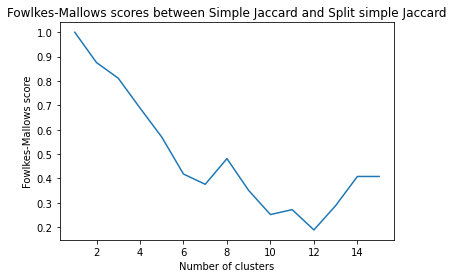

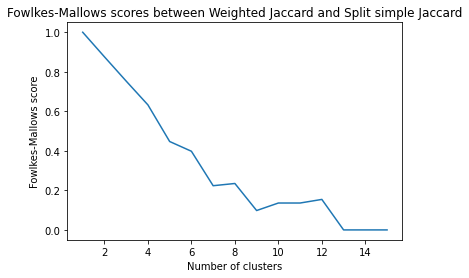

In [6]:
Comparison.compare_dendrogram_using_fowlkes_mallows_score(coselog_simple_jaccard, coselog_simple_jaccard_split, "Simple Jaccard", "Split simple Jaccard")
Comparison.compare_dendrogram_using_fowlkes_mallows_score(coselog_weighted_jaccard, coselog_simple_jaccard_split, "Weighted Jaccard", "Split simple Jaccard")
Comparison.compare_dendrogram_using_fowlkes_mallows_score(coselog_simple_jaccard, coselog_weighted_jaccard, "Simple Jaccard", "Weighted Jaccard")

Also compare the clusterings of the attribute org:resource

In [7]:
coselog_simple_jaccard_attr = Jaccard.Simple_Jaccard(coselog)
coselog_simple_jaccard_attr.perform_clustering(no_plot=True, activity_key="org:resource")
coselog_simple_jaccard_split_attr = Jaccard.Simple_Jaccard(coselog)
coselog_simple_jaccard_split_attr.perform_clustering(no_plot=True, activity_key="org:resource", split_neighbours=True)
coselog_weighted_jaccard_attr = Jaccard.Weighted_Jaccard(coselog)
coselog_weighted_jaccard_attr.perform_clustering(no_plot=True, activity_key="org:resource")

{1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 0.9473684210526314,
 6: 0.890530111787581,
 7: 0.7557716659575356,
 8: 0.6912791325096611,
 9: 0.6290731675284379,
 10: 0.6386937616606635,
 11: 0.630855778150201,
 12: 0.6159686596063382,
 13: 0.5486709702787453,
 14: 0.4059626094160673,
 15: 0.2727039360619395,
 16: 0.2668380251118075,
 17: 0.2636669353576957,
 18: 0.25892815214653764,
 19: 0.2379050852590253,
 20: 0.3284860055592343,
 21: 0.3116511459654997,
 22: 0.28818543935741636,
 23: 0.3235077240413131,
 24: 0.2323209277987099,
 25: 0.16754156331667822,
 26: 0.15617376188860607,
 27: 0.14433756729740646,
 28: 0.1754656015858991,
 29: 0.18200630207731602,
 30: 0.21170244960998524,
 31: 0.23904572186687872,
 32: 0.1944611170656493,
 33: 0.22237479499833035,
 34: 0.27386127875258304,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0}

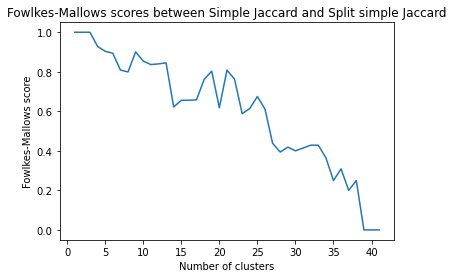

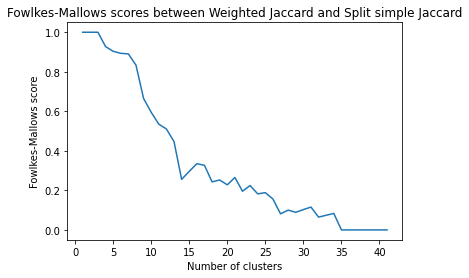

In [8]:
Comparison.compare_dendrogram_using_fowlkes_mallows_score(coselog_simple_jaccard_attr, coselog_simple_jaccard_split_attr, "Simple Jaccard", "Split simple Jaccard")
Comparison.compare_dendrogram_using_fowlkes_mallows_score(coselog_weighted_jaccard_attr, coselog_simple_jaccard_split_attr, "Weighted Jaccard", "Split simple Jaccard")
Comparison.compare_dendrogram_using_fowlkes_mallows_score(coselog_simple_jaccard_attr, coselog_weighted_jaccard_attr, "Simple Jaccard", "Weighted Jaccard")

### Analyze the Workday event log

Create the dendrograms for every distance measure

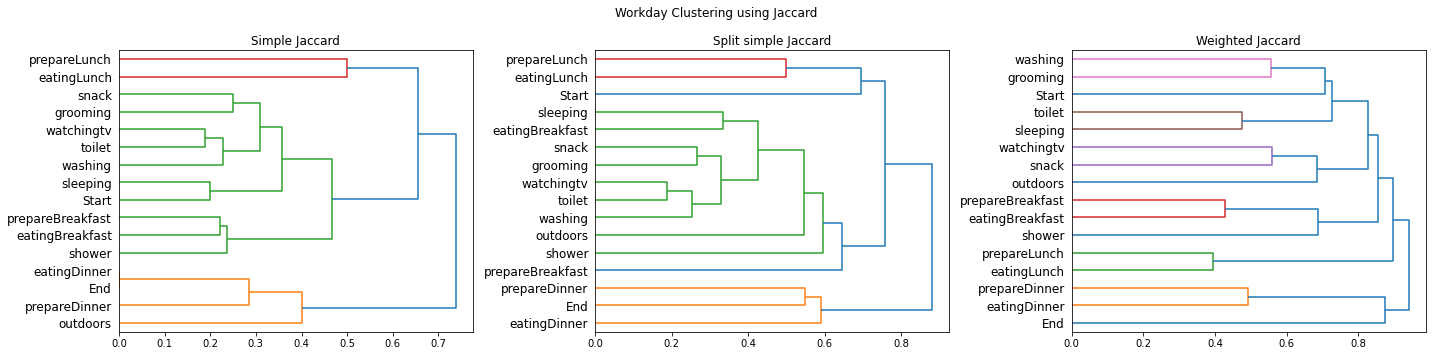

/home/jamie/Documents/Uni/Bachelor/Program/src/Label_Similarity.py:29: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  label_similarity = processed_act1.similarity(processed_act2)


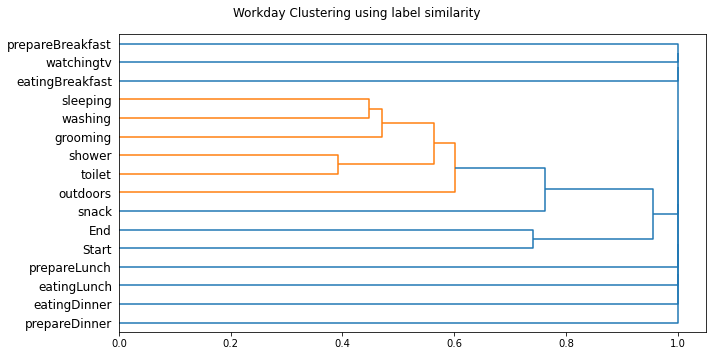

In [82]:
Log_processing.show_dfg_of_log(workday)
Comparison.show_jaccard_dendrograms_for_event_log(workday, "Workday Clustering using Jaccard", "workday_jaccard.jpg")
Comparison.show_n_gram_dendrograms_for_event_log(workday, "Workday Clustering using N_grams", "workday_n_gram.jpg")
Comparison.show_label_similarity_dendrograms_for_event_log(workday, "Workday Clustering using label similarity", "workday_label_sim.jpg")

Create the hierarchy files for the event log for every distance metric


In [10]:
workday_path = "../logs/workday.xes"
workday_prefix = "Workday"

In [11]:
workday_simp_jacc_path = Anonymization.create_activity_hierarchy_file(workday_path, workday_prefix, "Simple_Jaccard")
workday_weight_jacc_path = Anonymization.create_activity_hierarchy_file(workday_path, workday_prefix, "Weighted_Jaccard")
workday_simp_n_gram_path = Anonymization.create_activity_hierarchy_file(workday_path, workday_prefix, "Simple_Jaccard_N_Gram", length=2)
workday_weight_n_gram_path = Anonymization.create_activity_hierarchy_file(workday_path, workday_prefix, "Weighted_Jaccard_N_Gram", length=2)
workday_label_path = Anonymization.create_activity_hierarchy_file(workday_path, workday_prefix, "Label_Similarity")

parsing log, completed traces ::   0%|          | 0/25 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/25 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/25 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/25 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/25 [00:00<?, ?it/s]

/home/jamie/Documents/Uni/Bachelor/Program/src/Label_Similarity.py:29: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  label_similarity = processed_act1.similarity(processed_act2)


#### Anonymize the Workday event log

Anonymize the event log with k = 2, 5, 10 using Simple Jaccard

In [12]:
for k in [2, 5, 10]:
    priv_workday_simp_jacc = Anonymization.anonymize_log(
        workday_path,
        workday_prefix,
        k,
        workday_simp_jacc_path
    )

parsing log, completed traces ::   0%|          | 0/25 [00:00<?, ?it/s]

Retrieving information from event log...
Complete ✓
--------------------------------------------------
Use MAFFT Vectorization to align traces


nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
nalphabets = 256
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 25
done.

Constructing a UPGMA tree (efffree=0) ... 
   20 / 25
done.

Progressive alignment 1/2... 
STEP    14 / 24 
Reallocating..done. *alloclen = 1186
STEP    24 / 24  h
done.

Making a distance matrix from msa.. 
    0 / 25
done.

Constructing a UPGMA tree (efffree=1) ... 
   20 / 25
done.

Progressive alignment 2/2... 
STEP    15 / 24 
Reallocating..done. *alloclen = 1191
STEP    16 / 24 

Complete ✓
--------------------------------------------------
Convert result to arx readable csv


STEP    24 / 24  h
done.

disttbfast (text) Version 7.490
alg=A, model=Extended, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 NW-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into gap-rich regions than previous versions.
To disable this change, add the --leavegappyregion option.



TypeError: 'NoneType' object is not iterable

Anonymize the event log with k = 2, 5, 10 using Weighted Jaccard

In [ ]:
for k in [2, 5, 10]:
    priv_workday_weight_jacc = Anonymization.anonymize_log(
        workday_path,
        workday_prefix,
        k,
        workday_weight_jacc_path
    )

Anonymize the event log with k = 2, 5, 10 using Simple Jaccard N-Gram length 3

In [ ]:
for k in [2, 5, 10]:
    priv_workday_simp_n_gram = Anonymization.anonymize_log(
        workday_path,
        workday_prefix,
        k,
        workday_simp_n_gram_path
    )

Anonymize the event log with k = 2, 5, 10 using Weighted Jaccard N-Gram length 3

In [ ]:
for k in [2, 5, 10]:
    priv_workday_weight_n_gram = Anonymization.anonymize_log(
        workday_path,
        workday_prefix,
        k,
        workday_weight_n_gram_path
    )

Open handover graphs of the event log


Open the handovers of the anonymized logs


Compare the clusterings with the Fowlkes-Mallows-Score


In [14]:
workday_simple_jaccard = Jaccard.Simple_Jaccard(workday)
workday_simple_jaccard.perform_clustering(no_plot=True)
workday_simple_jaccard_split = Jaccard.Simple_Jaccard(workday)
workday_simple_jaccard_split.perform_clustering(no_plot=True, split_neighbours=True)
workday_weighted_jaccard = Jaccard.Weighted_Jaccard(workday)
workday_weighted_jaccard.perform_clustering(no_plot=True)
workday_simple_n_gram = Jaccard.Jaccard_N_grams(workday)
workday_simple_n_gram.perform_clustering(no_plot=True, length=3)
workday_weighted_n_gram = Jaccard.Weighted_Jaccard_N_grams(workday)
workday_weighted_n_gram.perform_clustering(no_plot=True, length=3)

{1: 1.0,
 2: 0.8566233973659347,
 3: 0.9199418174856334,
 4: 0.6898792816876329,
 5: 0.7401956568297401,
 6: 0.6545454545454545,
 7: 0.539157389535459,
 8: 0.34412360080584264,
 9: 0.2849014411490948,
 10: 0.14547859349066158,
 11: 0.24618298195866545,
 12: 0.1414213562373095,
 13: 0.0,
 14: 0.0,
 15: 0.0}

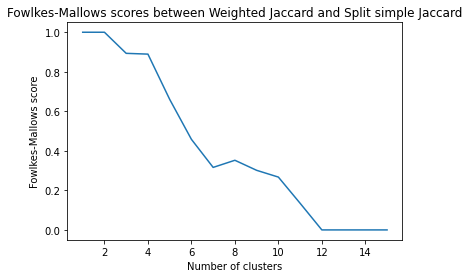

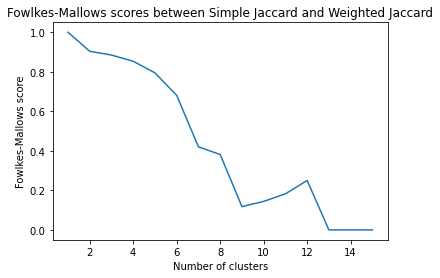

In [15]:
Comparison.compare_dendrogram_using_fowlkes_mallows_score(workday_simple_jaccard, workday_simple_jaccard_split, "Simple Jaccard", "Split simple Jaccard")
Comparison.compare_dendrogram_using_fowlkes_mallows_score(workday_weighted_jaccard, workday_simple_jaccard_split, "Weighted Jaccard", "Split simple Jaccard")
Comparison.compare_dendrogram_using_fowlkes_mallows_score(workday_simple_jaccard, workday_weighted_jaccard, "Simple Jaccard", "Weighted Jaccard")
Comparison.compare_dendrogram_using_fowlkes_mallows_score(workday_simple_n_gram, workday_weighted_n_gram, "Simple Jaccard", "Weighted Jaccard")

### Analyze the hospital billing event log

Create the dendrograms for every distance measure

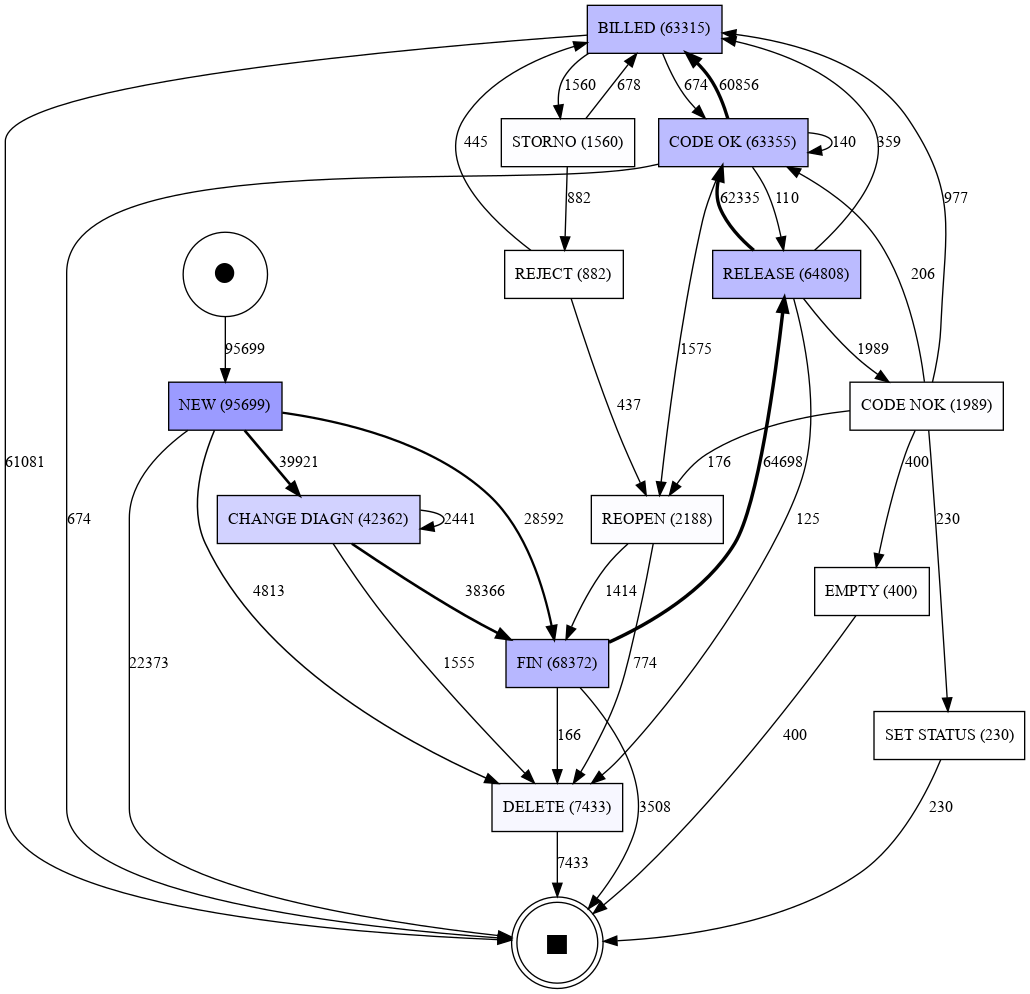

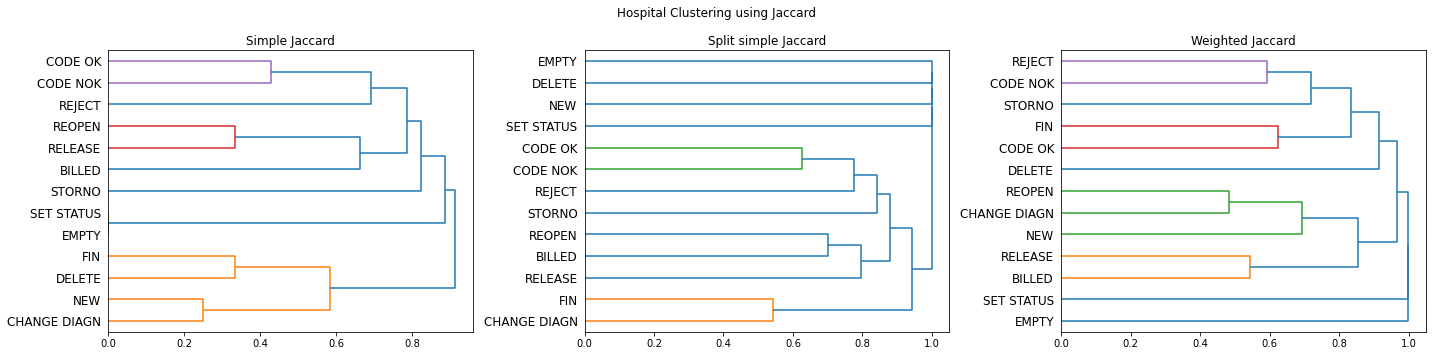

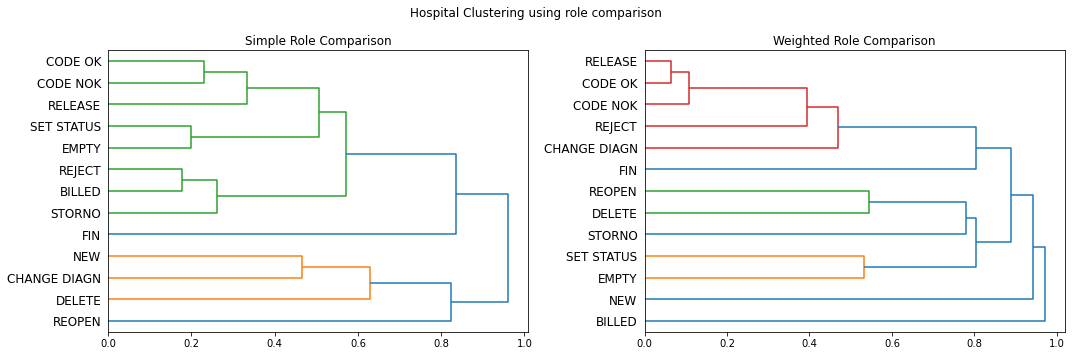

/home/jamie/Documents/Uni/Bachelor/Program/src/Label_Similarity.py:29: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  label_similarity = processed_act1.similarity(processed_act2)


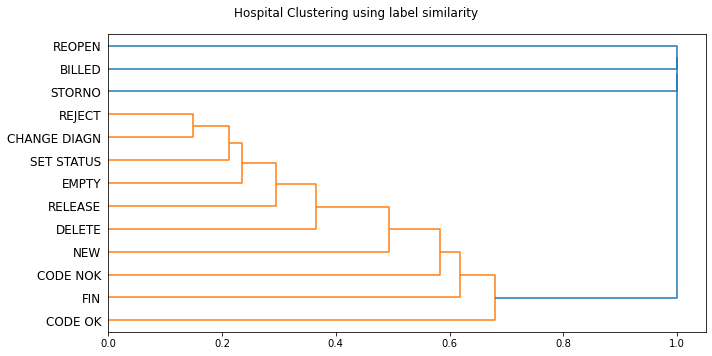

In [94]:
Log_processing.show_dfg_of_log(hospital)
Comparison.show_jaccard_dendrograms_for_event_log(hospital, "Hospital Clustering using Jaccard", "hospital_jaccard.jpg")
Comparison.show_n_gram_dendrograms_for_event_log(hospital, "Hospital Clustering using N_grams", "hospital_n_gram.jpg")
Comparison.show_role_comparison_dendrograms_for_event_log(hospital, "concept:name", "org:resource", "Hospital Clustering using role comparison", "hospital_role_comp.jpg")
Comparison.show_label_similarity_dendrograms_for_event_log(hospital, "Hospital Clustering using label similarity", "hospital_label_sim.jpg")

Create the hierarchy files for the event log for every distance metric


In [16]:
hospital_path = "../logs/hospital_billing.xes"
hospital_prefix = "Hospital"

In [86]:
hospital_simp_jacc_path = Anonymization.create_activity_hierarchy_file(hospital_path, hospital_prefix, "Simple_Jaccard")
hospital_weight_jacc_path = Anonymization.create_activity_hierarchy_file(hospital_path, hospital_prefix, "Weighted_Jaccard")
hospital_simp_n_gram_path = Anonymization.create_activity_hierarchy_file(hospital_path, hospital_prefix, "Simple_Jaccard_N_Gram", length=2)
hospital_weight_n_gram_path = Anonymization.create_activity_hierarchy_file(hospital_path, hospital_prefix, "Weighted_Jaccard_N_Gram", length=2)
hospital_simp_role_path = Anonymization.create_activity_hierarchy_file(hospital_path, hospital_prefix, "Simple_Role_Similarity", roles_column="org:resource")
hospital_weight_role_path = Anonymization.create_activity_hierarchy_file(hospital_path, hospital_prefix, "Weighted_Role_Similarity", roles_column="org:resource")
hospital_label_path = Anonymization.create_activity_hierarchy_file(hospital_path, hospital_prefix, "Label_Similarity")

parsing log, completed traces ::   0%|          | 0/100000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/100000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/100000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/100000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/100000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/100000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/100000 [00:00<?, ?it/s]

/home/jamie/Documents/Uni/Bachelor/Program/src/Label_Similarity.py:29: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  label_similarity = processed_act1.similarity(processed_act2)


#### Anonymize the Hospital billing event log

Anonymize the event log with k = 5, 10 and 20 using Simple Jaccard


Anonymize the event log with k = 5, 10 and 20 using Weighted Jaccard

Open handover graphs of the event log


Open the handovers of the anonymized logs


Compare the clusterings with the Fowlkes-Mallows-Score


In [19]:
hospital_simple_jaccard = Jaccard.Simple_Jaccard(hospital)
hospital_simple_jaccard.perform_clustering(no_plot=True)
hospital_simple_jaccard_split = Jaccard.Simple_Jaccard(hospital)
hospital_simple_jaccard_split.perform_clustering(no_plot=True, split_neighbours=True)
hospital_weighted_jaccard = Jaccard.Weighted_Jaccard(hospital)
hospital_weighted_jaccard.perform_clustering(no_plot=True)

{1: 1.0,
 2: 0.6457765999379483,
 3: 0.6880237084407945,
 4: 0.3411211461689767,
 5: 0.43412157106222954,
 6: 0.24174688920761409,
 7: 0.11785113019775792,
 8: 0.18257418583505536,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0}

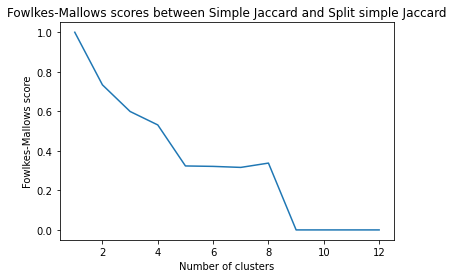

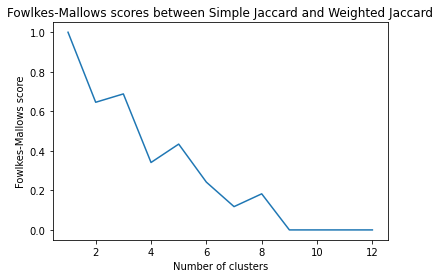

In [20]:
Comparison.compare_dendrogram_using_fowlkes_mallows_score(hospital_simple_jaccard, hospital_simple_jaccard_split, "Simple Jaccard", "Split simple Jaccard")
Comparison.compare_dendrogram_using_fowlkes_mallows_score(hospital_weighted_jaccard, hospital_simple_jaccard_split, "Weighted Jaccard", "Split simple Jaccard")
Comparison.compare_dendrogram_using_fowlkes_mallows_score(hospital_simple_jaccard, hospital_weighted_jaccard, "Simple Jaccard", "Weighted Jaccard")